# Load library and data


In [453]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

df = pd.read_csv('primary_data.csv', delimiter=';')
df = df.drop(columns=['name'])
df.head()

family class cap-diameter cap-shape Cap-surface cap-color  \
0  Amanita Family     p     [10, 20]    [x, f]      [g, h]    [e, o]   
1  Amanita Family     p      [5, 10]    [p, x]         [g]       [n]   
2  Amanita Family     p     [10, 15]    [x, f]         NaN    [g, n]   
3  Amanita Family     e      [5, 15]    [x, f]         NaN       [n]   
4  Amanita Family     p      [5, 12]    [x, f]         [h]       [r]   

  does-bruise-or-bleed gill-attachment gill-spacing gill-color stem-height  \
0                  [f]             [e]          NaN        [w]    [15, 20]   
1                  [f]             [e]          NaN        [w]     [6, 10]   
2                  [f]             [e]          NaN        [w]    [10, 12]   
3                  [t]             NaN          NaN        [w]     [7, 15]   
4                  [f]             NaN          [c]        [w]    [10, 12]   

  stem-width stem-root stem-surface stem-color veil-type veil-color has-ring  \
0   [15, 20]       [s]          [y]        [w]       [u]        [w]      [t]   
1   [10, 20]       NaN          [y]        [w]       [u]        [w]      [t]   
2   [10, 20]       NaN          NaN        [w]       [u]        [w]      [t]   
3   [10, 25]       [b]          NaN        [w]       [u]        [w]      [t]   
4   [10, 20]       NaN          NaN        [w]       [u]        [w]      [t]   

  ring-type Spore-print-color habitat     season  
0    [g, p]               NaN     [d]  [u, a, w]  
1       [p]               NaN     [d]     [u, a]  
2    [e, g]               NaN     [d]     [u, a]  
3       [g]               NaN     [d]     [u, a]  
4    [g, p]               NaN     [d]     [u, a]

In [454]:
df

family class cap-diameter  cap-shape Cap-surface cap-color  \
0        Amanita Family     p     [10, 20]     [x, f]      [g, h]    [e, o]   
1        Amanita Family     p      [5, 10]     [p, x]         [g]       [n]   
2        Amanita Family     p     [10, 15]     [x, f]         NaN    [g, n]   
3        Amanita Family     e      [5, 15]     [x, f]         NaN       [n]   
4        Amanita Family     p      [5, 12]     [x, f]         [h]       [r]   
..                  ...   ...          ...        ...         ...       ...   
168   Saddle-Cup Family     p       [2, 6]        [o]         NaN       [w]   
169       Bracket Fungi     p       [2, 4]        [o]         NaN    [g, k]   
170       Bracket Fungi     p      [5, 15]        [o]         NaN    [n, e]   
171        Morel Family     e       [3, 8]  [p, c, o]         NaN    [n, g]   
172  Jelly Discs Family     p     [1, 1.5]  [x, f, s]         [s]       [y]   

    does-bruise-or-bleed gill-attachment gill-spacing gill-color stem-height  \
0                    [f]             [e]          NaN        [w]    [15, 20]   
1                    [f]             [e]          NaN        [w]     [6, 10]   
2                    [f]             [e]          NaN        [w]    [10, 12]   
3                    [t]             NaN          NaN        [w]     [7, 15]   
4                    [f]             NaN          [c]        [w]    [10, 12]   
..                   ...             ...          ...        ...         ...   
168                  [f]             [f]          [f]        [f]      [4, 7]   
169                  [f]             [f]          [f]        [f]      [2, 5]   
170                  [f]             [f]          [f]        [f]      [2, 5]   
171                  [f]             [f]          [f]        [f]      [3, 8]   
172                  [f]             [f]          [f]        [f]      [2, 5]   

    stem-width stem-root stem-surface stem-color veil-type veil-color  \
0     [15, 20]       [s]          [y]        [w]       [u]        [w]   
1     [10, 20]       NaN          [y]        [w]       [u]        [w]   
2     [10, 20]       NaN          NaN        [w]       [u]        [w]   
3     [10, 25]       [b]          NaN        [w]       [u]        [w]   
4     [10, 20]       NaN          NaN        [w]       [u]        [w]   
..         ...       ...          ...        ...       ...        ...   
168   [20, 40]       NaN          [g]        [w]       NaN        NaN   
169   [10, 20]       NaN          [g]     [g, n]       NaN        NaN   
170   [20, 30]       NaN          [g]        [n]       NaN        NaN   
171   [15, 25]       NaN          NaN        [n]       NaN        NaN   
172     [4, 7]       NaN          NaN        [y]       NaN        NaN   

    has-ring ring-type Spore-print-color habitat     season  
0        [t]    [g, p]               NaN     [d]  [u, a, w]  
1        [t]       [p]               NaN     [d]     [u, a]  
2        [t]    [e, g]               NaN     [d]     [u, a]  
3        [t]       [g]               NaN     [d]     [u, a]  
4        [t]    [g, p]               NaN     [d]     [u, a]  
..       ...       ...               ...     ...        ...  
168      [t]       [f]               NaN  [p, d]     [u, a]  
169      [f]       [f]               NaN     [d]     [u, a]  
170      [f]       [f]               NaN     [d]     [s, u]  
171      [f]       [f]               NaN  [l, d]        [s]  
172      [f]       [f]               NaN     [d]     [u, a]  

[173 rows x 22 columns]

# Feature Engineering


## Min - Max cap diameter


In [455]:
df['class'].replace({'p': 'poisonous', 'e': 'edible'}, inplace=True)
df['min_cap_diameter'] = df['cap-diameter'].apply(lambda x: float(x.strip('[]').split(', ')[0]))
df['max_cap_diameter'] = df['cap-diameter'].apply(lambda x: float(x.strip('[]').split(', ')[1]) if len(x.strip('[]').split(', ')) > 1 else float(x.strip('[]').split(', ')[0]))
df.drop(columns=['cap-diameter'], inplace=True)
df.head()

family      class cap-shape Cap-surface cap-color  \
0  Amanita Family  poisonous    [x, f]      [g, h]    [e, o]   
1  Amanita Family  poisonous    [p, x]         [g]       [n]   
2  Amanita Family  poisonous    [x, f]         NaN    [g, n]   
3  Amanita Family     edible    [x, f]         NaN       [n]   
4  Amanita Family  poisonous    [x, f]         [h]       [r]   

  does-bruise-or-bleed gill-attachment gill-spacing gill-color stem-height  \
0                  [f]             [e]          NaN        [w]    [15, 20]   
1                  [f]             [e]          NaN        [w]     [6, 10]   
2                  [f]             [e]          NaN        [w]    [10, 12]   
3                  [t]             NaN          NaN        [w]     [7, 15]   
4                  [f]             NaN          [c]        [w]    [10, 12]   

  stem-width stem-root stem-surface stem-color veil-type veil-color has-ring  \
0   [15, 20]       [s]          [y]        [w]       [u]        [w]      [t]   
1   [10, 20]       NaN          [y]        [w]       [u]        [w]      [t]   
2   [10, 20]       NaN          NaN        [w]       [u]        [w]      [t]   
3   [10, 25]       [b]          NaN        [w]       [u]        [w]      [t]   
4   [10, 20]       NaN          NaN        [w]       [u]        [w]      [t]   

  ring-type Spore-print-color habitat     season  min_cap_diameter  \
0    [g, p]               NaN     [d]  [u, a, w]             10.00   
1       [p]               NaN     [d]     [u, a]              5.00   
2    [e, g]               NaN     [d]     [u, a]             10.00   
3       [g]               NaN     [d]     [u, a]              5.00   
4    [g, p]               NaN     [d]     [u, a]              5.00   

   max_cap_diameter  
0             20.00  
1             10.00  
2             15.00  
3             15.00  
4             12.00

## cap-shape


In [456]:
import ast

# Parse the cap-shape column to extract individual shapes

# Create a mapping for shape codes to readable names
mapping = {
    'b': 'bell',
    'c': 'conical',
    'x': 'convex',
    'f': 'flat',
    'k': 'knobbed',
    'p': 'sunken',
    's': 'spherical',
    'o': 'other'
}

# Parse the cap-shape lists and create separate columns for each unique shape in each row
shape_data = []
for idx, shapes_str in enumerate(df['cap-shape']):
    try:
        shapes_list = ast.literal_eval(shapes_str)
        if not isinstance(shapes_list, list):
            shapes_list = [shapes_list]
    except:
        shapes_list = [shapes_str.strip('[]').replace("'", "").replace(" ", "")]

    shape_data.append(shapes_list)

# Create a temporary dataframe to work with shapes
shape_df = pd.DataFrame({'shapes': shape_data})

# Create one-hot encoded columns for each shape type
for shape_code, shape_name in mapping.items():
    column_name = f'cap_shape_{shape_name}'
    df[column_name] = shape_df['shapes'].apply(lambda x: 1 if shape_code in x else 0)

# Drop the original cap-shape column
df.drop(columns=['cap-shape'], inplace=True)

## Cap-surface


In [457]:
# Parse the Cap-surface column to extract individual surfaces

# Create a mapping for surface codes to readable names
surface_mapping = {
    'i': 'fibrous',
    'g': 'grooves',
    'y': 'scaly',
    's': 'smooth',
    'h': 'shiny',
    'l': 'leathery',
    'k': 'silky',
    't': 'sticky',
    'w': 'wrinkled',
    'e': 'fleshy'
}

# Parse the Cap-surface lists and create separate columns for each unique surface in each row
surface_data = []
for idx, surfaces_str in enumerate(df['Cap-surface']):
    if pd.isna(surfaces_str):
        surfaces_list = []
    else:
        try:
            surfaces_list = ast.literal_eval(surfaces_str)
            if not isinstance(surfaces_list, list):
                surfaces_list = [surfaces_list]
        except:
            surfaces_list = [surfaces_str.strip('[]').replace("'", "").replace(" ", "")]

    surface_data.append(surfaces_list)

# Create a temporary dataframe to work with surfaces
surface_df = pd.DataFrame({'surfaces': surface_data})

# Create one-hot encoded columns for each surface type
for surface_code, surface_name in surface_mapping.items():
    column_name = f'cap_surface_{surface_name}'
    df[column_name] = surface_df['surfaces'].apply(lambda x: 1 if surface_code in x else 0)

# Drop the original Cap-surface column
df.drop(columns=['Cap-surface'], inplace=True)

## cap-color


In [458]:
# Parse the cap-color column to extract individual colors

# Create a mapping for color codes to readable names
color_mapping = {
    'n': 'brown',
    'b': 'buff',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow',
    'l': 'blue',
    'o': 'orange',
    'k': 'black'
}

# Parse the cap-color lists and create separate columns for each unique color in each row
color_data = []
for idx, colors_str in enumerate(df['cap-color']):
    if pd.isna(colors_str):
        colors_list = []
    else:
        try:
            colors_list = ast.literal_eval(colors_str)
            if not isinstance(colors_list, list):
                colors_list = [colors_list]
        except:
            colors_list = [colors_str.strip('[]').replace("'", "").replace(" ", "")]

    color_data.append(colors_list)

# Create a temporary dataframe to work with colors
color_df = pd.DataFrame({'colors': color_data})

# Create one-hot encoded columns for each color type
for color_code, color_name in color_mapping.items():
    column_name = f'cap_color_{color_name}'
    df[column_name] = color_df['colors'].apply(lambda x: 1 if color_code in x else 0)

# Drop the original cap-color column
df.drop(columns=['cap-color'], inplace=True)

## does-bruise-or-bleed


In [459]:
df['does-bruise-or-bleed'].replace({'[t]': 'yes', '[f]': 'no'}, inplace=True)

## gill-attachment


In [460]:
# Parse the gill-attachment column to extract individual colors

# Create a mapping for color codes to readable names
attachment_mapping = {
    'a': 'adnate',
    'x': 'adnexed', 
    'd': 'decurrent',
    'e': 'free',
    's': 'sinuate',
    'p': 'pores',
    'f': 'none',
    '?': 'unknown'
}

# Parse the gill-attachment lists and create separate columns for each unique color in each row
color_data = []
for idx, colors_str in enumerate(df['gill-attachment']):
    if pd.isna(colors_str):
        colors_list = []
    else:
        try:
            colors_list = ast.literal_eval(colors_str)
            if not isinstance(colors_list, list):
                colors_list = [colors_list]
        except:
            colors_list = [colors_str.strip('[]').replace("'", "").replace(" ", "")]

    color_data.append(colors_list)

# Create a temporary dataframe to work with colors
color_df = pd.DataFrame({'colors': color_data})

# Create one-hot encoded columns for each color type
for color_code, color_name in attachment_mapping.items():
    column_name = f'gill_attachment_{color_name}'
    df[column_name] = color_df['colors'].apply(lambda x: 1 if color_code in x else 0)

# Drop the original gill-attachment column
df.drop(columns=['gill-attachment'], inplace=True)

## gill-spacing


In [461]:
df['gill-spacing'].replace({
    '[c]': 'close', 
    '[d]': 'distant', 
    '[f]': 'none'
}, inplace=True)

## gill-color


In [462]:
# Parse the gill-color column to extract individual colors

# Create a mapping for color codes to readable names
color_mapping = {
    'n': 'brown',
    'b': 'buff',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow',
    'l': 'blue',
    'o': 'orange',
    'k': 'black',
    'f': 'none'
}

# Parse the gill-color lists and create separate columns for each unique color in each row
color_data = []
for idx, colors_str in enumerate(df['gill-color']):
    if pd.isna(colors_str):
        colors_list = []
    else:
        try:
            colors_list = ast.literal_eval(colors_str)
            if not isinstance(colors_list, list):
                colors_list = [colors_list]
        except:
            colors_list = [colors_str.strip('[]').replace("'", "").replace(" ", "")]

    color_data.append(colors_list)

# Create a temporary dataframe to work with colors
color_df = pd.DataFrame({'colors': color_data})

# Create one-hot encoded columns for each color type
for color_code, color_name in color_mapping.items():
    column_name = f'gill_color_{color_name}'
    df[column_name] = color_df['colors'].apply(lambda x: 1 if color_code in x else 0)

# Drop the original gill-color column
df.drop(columns=['gill-color'], inplace=True)

## stem-height


In [463]:
df['class'].replace({'p': 'poisonous', 'e': 'edible'}, inplace=True)
df['min_stem_height'] = df['stem-height'].apply(lambda x: float(x.strip('[]').split(', ')[0]))
df['max_stem_height'] = df['stem-height'].apply(lambda x: float(x.strip('[]').split(', ')[1]) if len(x.strip('[]').split(', ')) > 1 else float(x.strip('[]').split(', ')[0]))
df.drop(columns=['stem-height'], inplace=True)
df.head()

family      class does-bruise-or-bleed gill-spacing stem-width  \
0  Amanita Family  poisonous                   no          NaN   [15, 20]   
1  Amanita Family  poisonous                   no          NaN   [10, 20]   
2  Amanita Family  poisonous                   no          NaN   [10, 20]   
3  Amanita Family     edible                  yes          NaN   [10, 25]   
4  Amanita Family  poisonous                   no        close   [10, 20]   

  stem-root stem-surface stem-color veil-type veil-color has-ring ring-type  \
0       [s]          [y]        [w]       [u]        [w]      [t]    [g, p]   
1       NaN          [y]        [w]       [u]        [w]      [t]       [p]   
2       NaN          NaN        [w]       [u]        [w]      [t]    [e, g]   
3       [b]          NaN        [w]       [u]        [w]      [t]       [g]   
4       NaN          NaN        [w]       [u]        [w]      [t]    [g, p]   

  Spore-print-color habitat     season  min_cap_diameter  max_cap_diameter  \
0               NaN     [d]  [u, a, w]             10.00             20.00   
1               NaN     [d]     [u, a]              5.00             10.00   
2               NaN     [d]     [u, a]             10.00             15.00   
3               NaN     [d]     [u, a]              5.00             15.00   
4               NaN     [d]     [u, a]              5.00             12.00   

   cap_shape_bell  cap_shape_conical  cap_shape_convex  cap_shape_flat  \
0               0                  0                 0               0   
1               0                  0                 0               0   
2               0                  0                 0               0   
3               0                  0                 0               0   
4               0                  0                 0               0   

   cap_shape_knobbed  cap_shape_sunken  cap_shape_spherical  cap_shape_other  \
0                  0                 0                    0                0   
1                  0                 0                    0                0   
2                  0                 0                    0                0   
3                  0                 0                    0                0   
4                  0                 0                    0                0   

   cap_surface_fibrous  cap_surface_grooves  cap_surface_scaly  \
0                    0                    0                  0   
1                    0                    1                  0   
2                    0                    0                  0   
3                    0                    0                  0   
4                    0                    0                  0   

   cap_surface_smooth  cap_surface_shiny  cap_surface_leathery  \
0                   0                  0                     0   
1                   0                  0                     0   
2                   0                  0                     0   
3                   0                  0                     0   
4                   0                  1                     0   

   cap_surface_silky  cap_surface_sticky  cap_surface_wrinkled  \
0                  0                   0                     0   
1                  0                   0                     0   
2                  0                   0                     0   
3                  0                   0                     0   
4                  0                   0                     0   

   cap_surface_fleshy  cap_color_brown  cap_color_buff  cap_color_gray  \
0                   0                0               0               0   
1                   0                1               0               0   
2                   0                0               0               0   
3                   0                1               0               0   
4                   0                0               0               0   

   cap_color_green  cap_color_pink  cap_co

## stem-width


In [464]:
df['class'].replace({'p': 'poisonous', 'e': 'edible'}, inplace=True)
df['min_stem_width'] = df['stem-width'].apply(lambda x: float(x.strip('[]').split(', ')[0]))
df['max_stem_width'] = df['stem-width'].apply(lambda x: float(x.strip('[]').split(', ')[1]) if len(x.strip('[]').split(', ')) > 1 else float(x.strip('[]').split(', ')[0]))
df.drop(columns=['stem-width'], inplace=True)
df.head()

family      class does-bruise-or-bleed gill-spacing stem-root  \
0  Amanita Family  poisonous                   no          NaN       [s]   
1  Amanita Family  poisonous                   no          NaN       NaN   
2  Amanita Family  poisonous                   no          NaN       NaN   
3  Amanita Family     edible                  yes          NaN       [b]   
4  Amanita Family  poisonous                   no        close       NaN   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0          [y]        [w]       [u]        [w]      [t]    [g, p]   
1          [y]        [w]       [u]        [w]      [t]       [p]   
2          NaN        [w]       [u]        [w]      [t]    [e, g]   
3          NaN        [w]       [u]        [w]      [t]       [g]   
4          NaN        [w]       [u]        [w]      [t]    [g, p]   

  Spore-print-color habitat     season  min_cap_diameter  max_cap_diameter  \
0               NaN     [d]  [u, a, w]             10.00             20.00   
1               NaN     [d]     [u, a]              5.00             10.00   
2               NaN     [d]     [u, a]             10.00             15.00   
3               NaN     [d]     [u, a]              5.00             15.00   
4               NaN     [d]     [u, a]              5.00             12.00   

   cap_shape_bell  cap_shape_conical  cap_shape_convex  cap_shape_flat  \
0               0                  0                 0               0   
1               0                  0                 0               0   
2               0                  0                 0               0   
3               0                  0                 0               0   
4               0                  0                 0               0   

   cap_shape_knobbed  cap_shape_sunken  cap_shape_spherical  cap_shape_other  \
0                  0                 0                    0                0   
1                  0                 0                    0                0   
2                  0                 0                    0                0   
3                  0                 0                    0                0   
4                  0                 0                    0                0   

   cap_surface_fibrous  cap_surface_grooves  cap_surface_scaly  \
0                    0                    0                  0   
1                    0                    1                  0   
2                    0                    0                  0   
3                    0                    0                  0   
4                    0                    0                  0   

   cap_surface_smooth  cap_surface_shiny  cap_surface_leathery  \
0                   0                  0                     0   
1                   0                  0                     0   
2                   0                  0                     0   
3                   0                  0                     0   
4                   0                  1                     0   

   cap_surface_silky  cap_surface_sticky  cap_surface_wrinkled  \
0                  0                   0                     0   
1                  0                   0                     0   
2                  0                   0                     0   
3                  0                   0                     0   
4                  0                   0                     0   

   cap_surface_fleshy  cap_color_brown  cap_color_buff  cap_color_gray  \
0                   0                0               0               0   
1                   0                1               0               0   
2                   0                0               0               0   
3                   0                1               0               0   
4                   0                0               0               0   

   cap_color_green  cap_color_pink  cap_color_purple  cap_color_red  \
0                0               0   

## veil-type


In [465]:
df['veil-type'].replace({
    '[p]': 'partial', 
    '[u]': 'universal'
}, inplace=True)


## stem-root


In [466]:
df['stem-root'].replace({
    '[b]': 'bulbous',
    '[s]': 'swollen', 
    '[c]': 'club',
    '[u]': 'cup',
    '[e]': 'equal',
    '[z]': 'rhizomorphs',
    '[r]': 'rooted',
    '[f]': 'none',
}, inplace=True)


## stem-surface


In [467]:
# Parse the stem-surface column to extract individual surfaces

# Create a mapping for surface codes to readable names
surface_mapping = {
    'i': 'fibrous',
    'g': 'grooves',
    'y': 'scaly',
    's': 'smooth',
    'h': 'shiny',
    'l': 'leathery',
    'k': 'silky',
    't': 'sticky',
    'w': 'wrinkled',
    'e': 'fleshy',
    'f': 'none'
}

# Parse the stem-surface lists and create separate columns for each unique surface in each row
surface_data = []
for idx, surfaces_str in enumerate(df['stem-surface']):
    if pd.isna(surfaces_str):
        surfaces_list = []
    else:
        try:
            surfaces_list = ast.literal_eval(surfaces_str)
            if not isinstance(surfaces_list, list):
                surfaces_list = [surfaces_list]
        except:
            surfaces_list = [surfaces_str.strip('[]').replace("'", "").replace(" ", "")]

    surface_data.append(surfaces_list)

# Create a temporary dataframe to work with surfaces
surface_df = pd.DataFrame({'surfaces': surface_data})

# Create one-hot encoded columns for each surface type
for surface_code, surface_name in surface_mapping.items():
    column_name = f'stem_surface_{surface_name}'
    df[column_name] = surface_df['surfaces'].apply(lambda x: 1 if surface_code in x else 0)

# Drop the original stem-surface column
df.drop(columns=['stem-surface'], inplace=True)

## stem-color


In [468]:
# Parse the stem-color column to extract individual colors

# Create a mapping for color codes to readable names
color_mapping = {
    'n': 'brown',
    'b': 'buff',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow',
    'l': 'blue',
    'o': 'orange',
    'k': 'black',
    'f': 'none'
}

# Parse the stem-color lists and create separate columns for each unique color in each row
color_data = []
for idx, colors_str in enumerate(df['stem-color']):
    if pd.isna(colors_str):
        colors_list = []
    else:
        try:
            colors_list = ast.literal_eval(colors_str)
            if not isinstance(colors_list, list):
                colors_list = [colors_list]
        except:
            colors_list = [colors_str.strip('[]').replace("'", "").replace(" ", "")]

    color_data.append(colors_list)

# Create a temporary dataframe to work with colors
color_df = pd.DataFrame({'colors': color_data})

# Create one-hot encoded columns for each color type
for color_code, color_name in color_mapping.items():
    column_name = f'stem_color_{color_name}'
    df[column_name] = color_df['colors'].apply(lambda x: 1 if color_code in x else 0)

# Drop the original stem-color column
df.drop(columns=['stem-color'], inplace=True)

## veil-color


In [469]:
# Parse the veil-color column to extract individual colors

# Create a mapping for color codes to readable names
color_mapping = {
    'n': 'brown',
    'b': 'buff',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow',
    'l': 'blue',
    'o': 'orange',
    'k': 'black',
    'f': 'none'
}

# Parse the veil-color lists and create separate columns for each unique color in each row
color_data = []
for idx, colors_str in enumerate(df['veil-color']):
    if pd.isna(colors_str):
        colors_list = []
    else:
        try:
            colors_list = ast.literal_eval(colors_str)
            if not isinstance(colors_list, list):
                colors_list = [colors_list]
        except:
            colors_list = [colors_str.strip('[]').replace("'", "").replace(" ", "")]

    color_data.append(colors_list)

# Create a temporary dataframe to work with colors
color_df = pd.DataFrame({'colors': color_data})

# Create one-hot encoded columns for each color type
for color_code, color_name in color_mapping.items():
    column_name = f'veil_color_{color_name}'
    df[column_name] = color_df['colors'].apply(lambda x: 1 if color_code in x else 0)

# Drop the original veil-color column
df.drop(columns=['veil-color'], inplace=True)

## has-ring


In [470]:
df['has-ring'].replace({'[t]': 'yes', '[f]': 'no'}, inplace=True)


## ring-type


In [471]:
# Parse the ring-type column to extract individual colors

# Create a mapping for color codes to readable names
ring_mapping = {
    'c': 'cobwebby',
    'e': 'evanescent', 
    'r': 'flaring',
    'g': 'grooved',
    'l': 'large',
    'p': 'pendant',
    's': 'sheathing',
    'z': 'zone',
    'y': 'scaly',
    'm': 'movable',
    'f': 'none',
    '?': 'unknown'
}

# Parse the ring-type lists and create separate columns for each unique color in each row
color_data = []
for idx, colors_str in enumerate(df['ring-type']):
    if pd.isna(colors_str):
        colors_list = []
    else:
        try:
            colors_list = ast.literal_eval(colors_str)
            if not isinstance(colors_list, list):
                colors_list = [colors_list]
        except:
            colors_list = [colors_str.strip('[]').replace("'", "").replace(" ", "")]

    color_data.append(colors_list)

# Create a temporary dataframe to work with colors
color_df = pd.DataFrame({'colors': color_data})

# Create one-hot encoded columns for each color type
for color_code, color_name in ring_mapping.items():
    column_name = f'ring_type_{color_name}'
    df[column_name] = color_df['colors'].apply(lambda x: 1 if color_code in x else 0)

# Drop the original ring-type column
df.drop(columns=['ring-type'], inplace=True)

## Spore-print-color


In [472]:
# Parse the Spore-print-color column to extract individual colors

# Create a mapping for color codes to readable names
color_mapping = {
    'n': 'brown',
    'b': 'buff',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow',
    'l': 'blue',
    'o': 'orange',
    'k': 'black'
}

# Parse the Spore-print-color lists and create separate columns for each unique color in each row
color_data = []
for idx, colors_str in enumerate(df['Spore-print-color']):
    if pd.isna(colors_str):
        colors_list = []
    else:
        try:
            colors_list = ast.literal_eval(colors_str)
            if not isinstance(colors_list, list):
                colors_list = [colors_list]
        except:
            colors_list = [colors_str.strip('[]').replace("'", "").replace(" ", "")]

    color_data.append(colors_list)

# Create a temporary dataframe to work with colors
color_df = pd.DataFrame({'colors': color_data})

# Create one-hot encoded columns for each color type
for color_code, color_name in color_mapping.items():
    column_name = f'Spore_print_color_{color_name}'
    df[column_name] = color_df['colors'].apply(lambda x: 1 if color_code in x else 0)

# Drop the original Spore-print-color column
df.drop(columns=['Spore-print-color'], inplace=True)

## habitat


In [473]:
df['habitat']

0         [d]
1         [d]
2         [d]
3         [d]
4         [d]
        ...  
168    [p, d]
169       [d]
170       [d]
171    [l, d]
172       [d]
Name: habitat, Length: 173, dtype: object

In [474]:
# Parse the habitat column to extract individual colors

# Create a mapping for color codes to readable names
habitat_mapping = {
    'g': 'grasses',
    'l': 'leaves', 
    'm': 'meadows',
    'p': 'paths',
    'h': 'heaths',
    'u': 'urban',
    'w': 'waste',
    'd': 'woods'
}

# Parse the habitat lists and create separate columns for each unique color in each row
color_data = []
for idx, colors_str in enumerate(df['habitat']):
    if pd.isna(colors_str):
        colors_list = []
    else:
        try:
            colors_list = ast.literal_eval(colors_str)
            if not isinstance(colors_list, list):
                colors_list = [colors_list]
        except:
            colors_list = [colors_str.strip('[]').replace("'", "").replace(" ", "")]

    color_data.append(colors_list)

# Create a temporary dataframe to work with colors
color_df = pd.DataFrame({'colors': color_data})

# Create one-hot encoded columns for each color type
for color_code, color_name in habitat_mapping.items():
    column_name = f'habitat_{color_name}'
    df[column_name] = color_df['colors'].apply(lambda x: 1 if color_code in x else 0)

# Drop the original habitat column
df.drop(columns=['habitat'], inplace=True)

## season


In [475]:
# Parse the season column to extract individual colors

# Create a mapping for color codes to readable names
season_mapping = {
    's': 'spring',
    'u': 'summer', 
    'a': 'autumn',
    'w': 'winter'
}

# Parse the season lists and create separate columns for each unique color in each row
color_data = []
for idx, colors_str in enumerate(df['season']):
    if pd.isna(colors_str):
        colors_list = []
    else:
        try:
            colors_list = ast.literal_eval(colors_str)
            if not isinstance(colors_list, list):
                colors_list = [colors_list]
        except:
            colors_list = [colors_str.strip('[]').replace("'", "").replace(" ", "")]

    color_data.append(colors_list)

# Create a temporary dataframe to work with colors
color_df = pd.DataFrame({'colors': color_data})

# Create one-hot encoded columns for each color type
for color_code, color_name in season_mapping.items():
    column_name = f'season_{color_name}'
    df[column_name] = color_df['colors'].apply(lambda x: 1 if color_code in x else 0)

# Drop the original season column
df.drop(columns=['season'], inplace=True)

# Exploratory Data Analysis


## Bivariate Analysis


In [476]:
def plot_bar_distribution(x, y='class', title='Distribution of Mushroom Families by Edibility Class'):
    """Plot the distribution of mushroom families by class with enhanced styling"""
    # Create a copy of the dataframe to avoid modifying the original
    df_plot = df.copy()

    # Handle NaN values by replacing them with 'Unknown'
    df_plot[x] = df_plot[x].fillna('Null')

    # Create a cross-tabulation to count family-class combinations
    family_class_counts = pd.crosstab(df_plot[x], df_plot[y])

    # Create a bar plot with enhanced styling
    fig, ax = plt.subplots(figsize=(14, 8))

    family_class_counts.plot(kind='bar', ax=ax, 
                        color=['#2E8B57', '#DC143C'],  # Sea green for edible, crimson for poisonous
                        alpha=0.8,
                        edgecolor='black',
                        linewidth=0.7)

    # Customize the plot
    ax.set_title(title,
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel(x.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_ylabel(f'Number of {y.replace("_", " ").title()}', fontsize=12, fontweight='bold')

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax.tick_params(axis='y', labelsize=10)

    # Customize legend
    ax.legend()

    # Add grid for better readability
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)

    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=8, rotation=0)

    plt.tight_layout()
    plt.show()

def plot_kde_distribution(x, y='class', title='Distribution'):
    """Plot distribution for numerical features by class"""
    plt.figure(figsize=(12, 6))

    # Create separate plots for each class
    for class_val in df[y].unique():
        subset = df[df[y] == class_val][x].dropna()
        sns.histplot(subset, alpha=0.6, label=f'{class_val}', kde=True, bins=20)

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(x.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_one_hot_distribution_by_class(feature_prefix, title=None):
    """Plot distribution of one-hot encoded features separated by class"""
    # Get columns that start with the feature prefix
    feature_columns = [col for col in df.columns if col.startswith(feature_prefix)]
    
    if not feature_columns:
        print(f"No columns found with prefix '{feature_prefix}'")
        return

    # Calculate counts for each feature by class
    edible_counts = df[df['class'] == 'edible'][feature_columns].sum().sort_values(ascending=False)
    poisonous_counts = df[df['class'] == 'poisonous'][feature_columns].sum().sort_values(ascending=False)

    # Create default title if not provided
    if title is None:
        title = f'Distribution of {feature_prefix.replace("_", " ").title()} by Class'

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Get all unique features
    all_features = sorted(set(edible_counts.index) | set(poisonous_counts.index))

    # Align both series to have the same index
    edible_aligned = edible_counts.reindex(all_features, fill_value=0)
    poisonous_aligned = poisonous_counts.reindex(all_features, fill_value=0)

    # Create bar positions
    x = range(len(all_features))
    width = 0.35

    # Create bars
    bars1 = ax.bar([i - width/2 for i in x], edible_aligned.values, width, 
                   label='Edible', color='#2E8B57', alpha=0.8, edgecolor='black', linewidth=0.7)
    bars2 = ax.bar([i + width/2 for i in x], poisonous_aligned.values, width,
                   label='Poisonous', color='#DC143C', alpha=0.8, edgecolor='black', linewidth=0.7)

    # Customize the plot
    ax.set_xlabel(feature_prefix.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels([col.replace(feature_prefix, '').replace('_', ' ').title() for col in all_features], 
                       rotation=45, ha='right', fontsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend()
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)

    # Add value labels on bars
    ax.bar_label(bars1, fontsize=8, rotation=0)
    ax.bar_label(bars2, fontsize=8, rotation=0)

    plt.tight_layout()
    plt.show()

### family


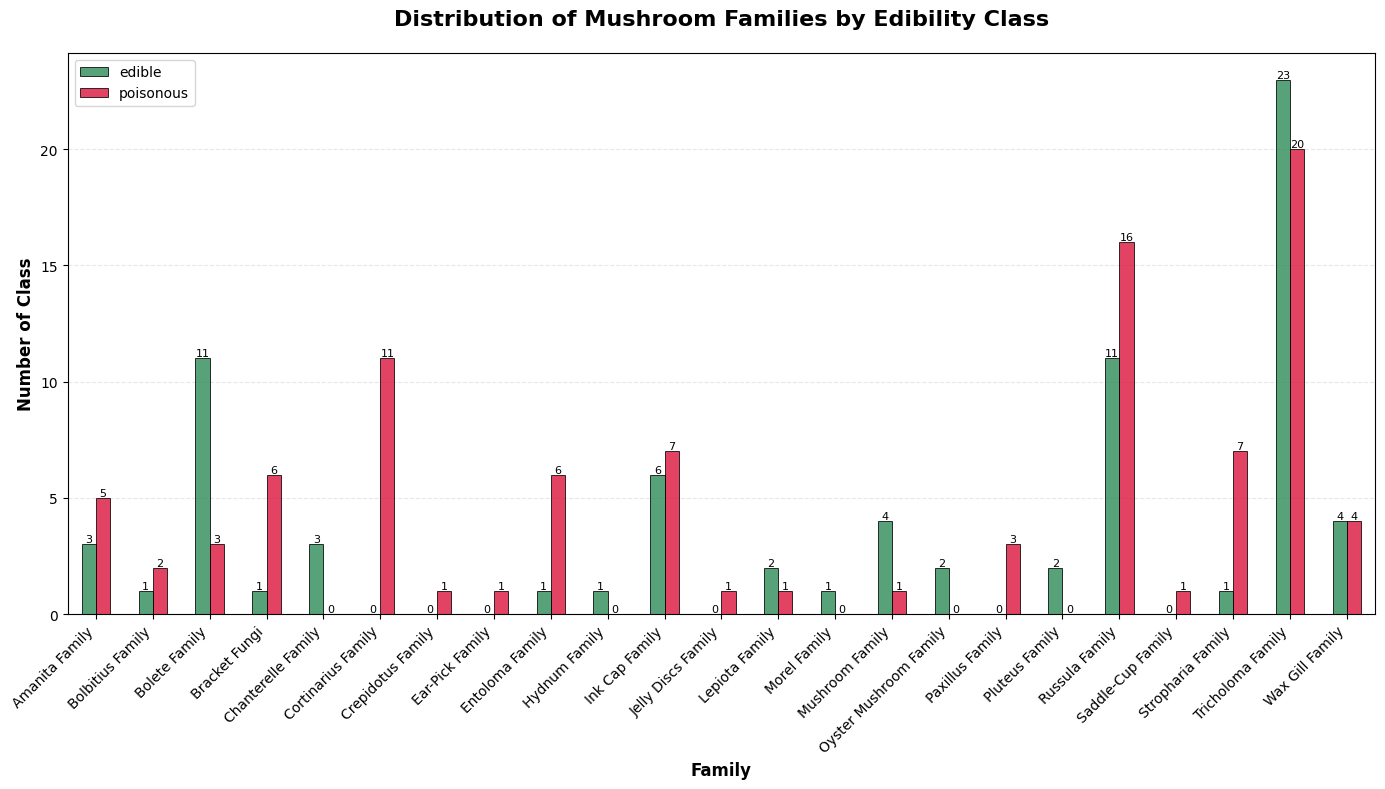

In [477]:
plot_bar_distribution(x='family', y='class', title='Distribution of Mushroom Families by Edibility Class')

### does-bruise-or-bleed


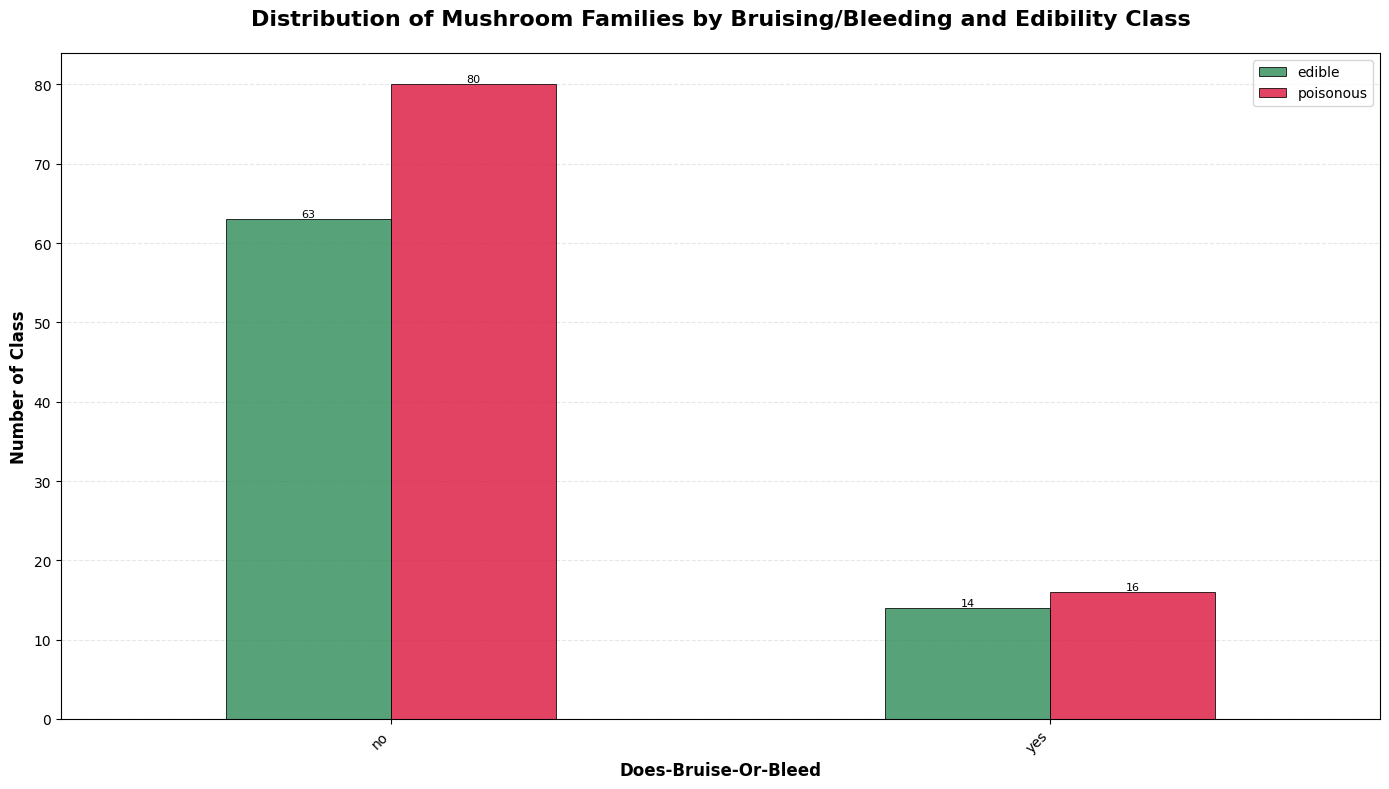

In [478]:
plot_bar_distribution(x='does-bruise-or-bleed', y='class', title='Distribution of Mushroom Families by Bruising/Bleeding and Edibility Class')

### gill-spacing


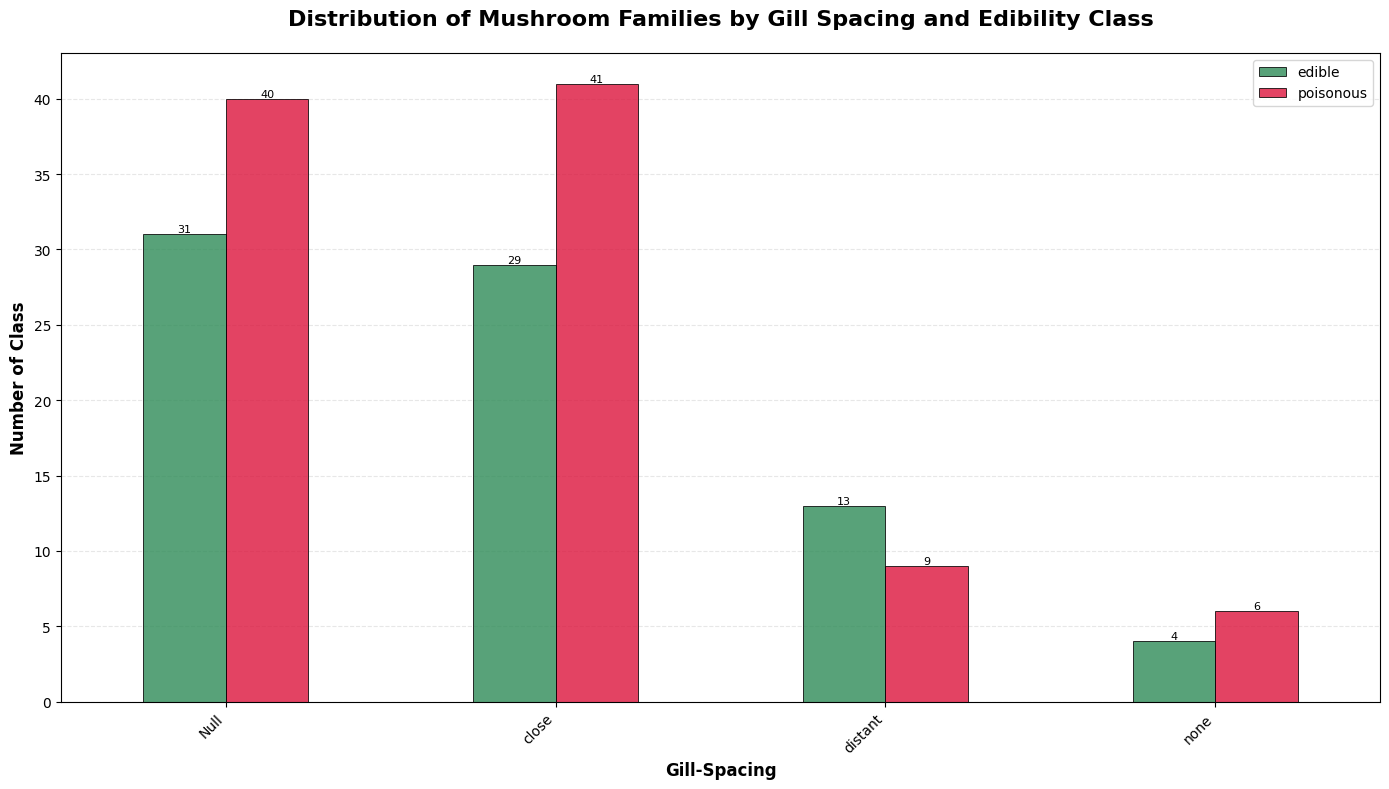

In [479]:
plot_bar_distribution(x='gill-spacing', y='class', title='Distribution of Mushroom Families by Gill Spacing and Edibility Class')

### stem-root


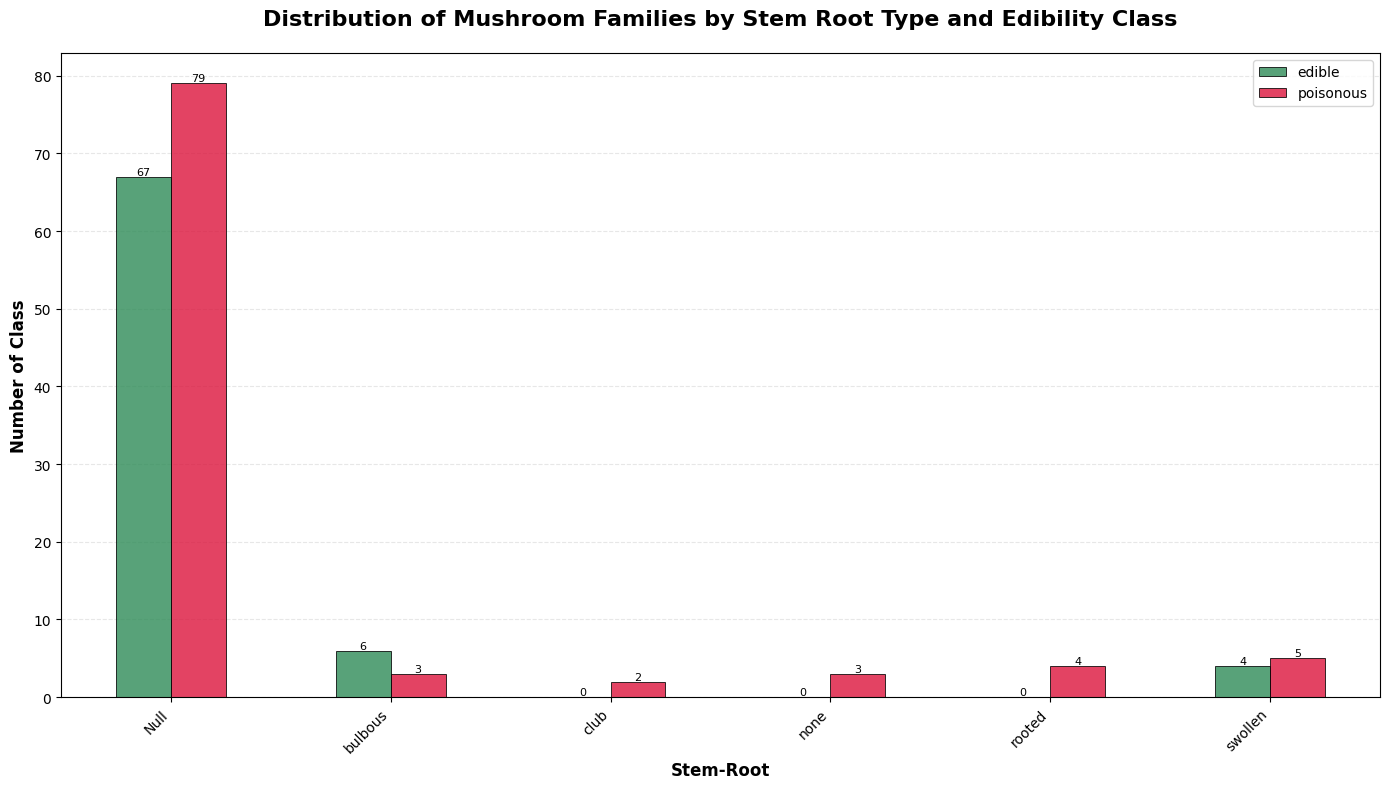

In [480]:
plot_bar_distribution(x='stem-root', y='class', title='Distribution of Mushroom Families by Stem Root Type and Edibility Class')

### veil-type


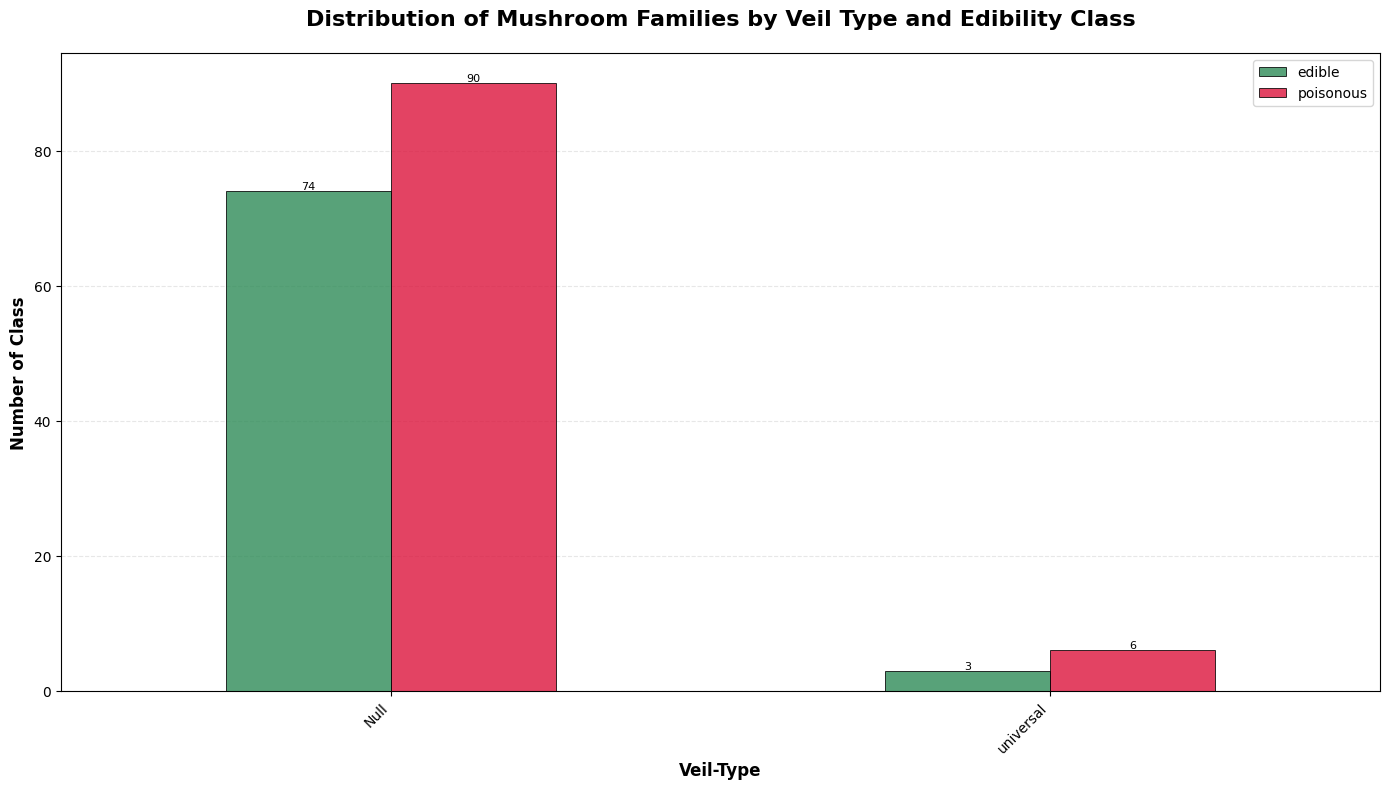

In [481]:
plot_bar_distribution(x='veil-type', y='class', title='Distribution of Mushroom Families by Veil Type and Edibility Class')

### has-ring


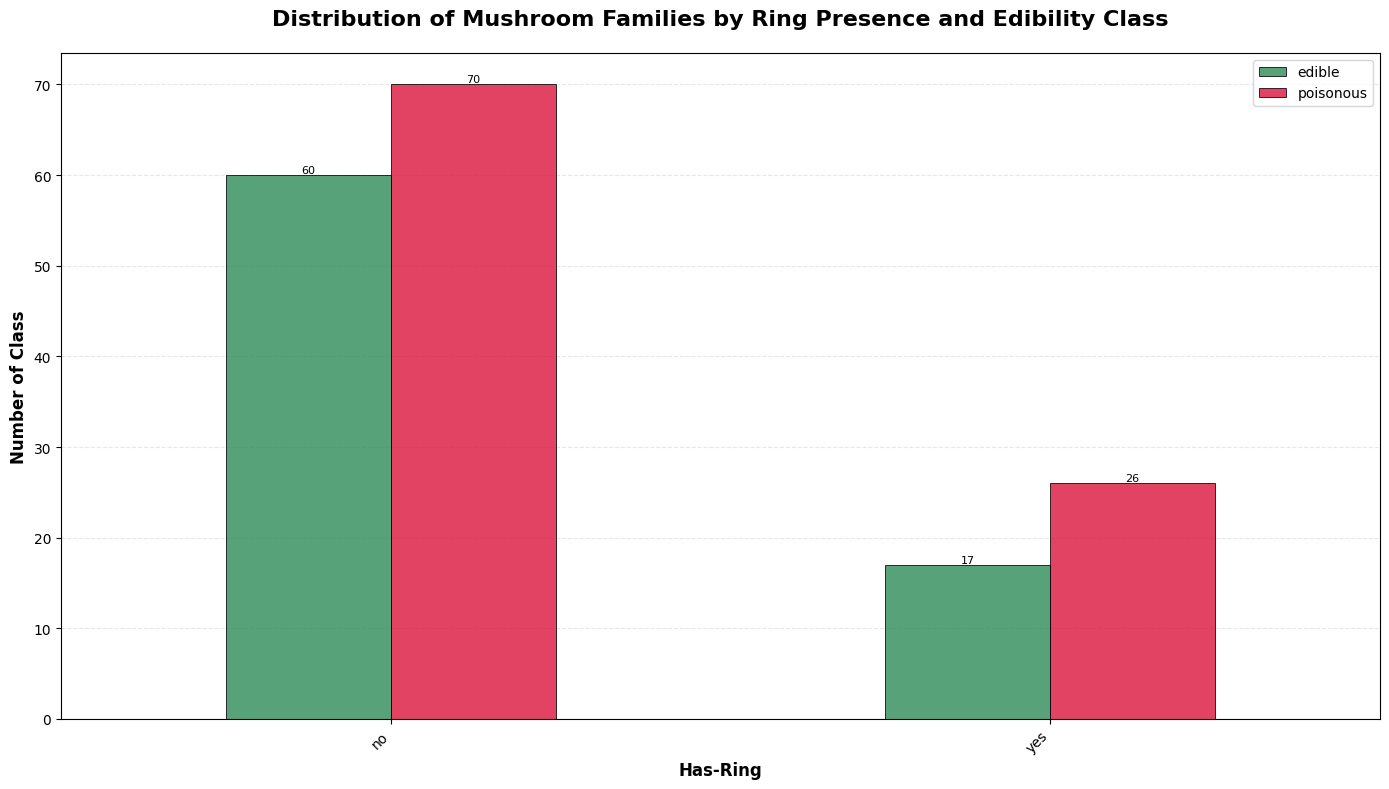

In [482]:
plot_bar_distribution(x='has-ring', y='class', title='Distribution of Mushroom Families by Ring Presence and Edibility Class')

### min_cap_diameter


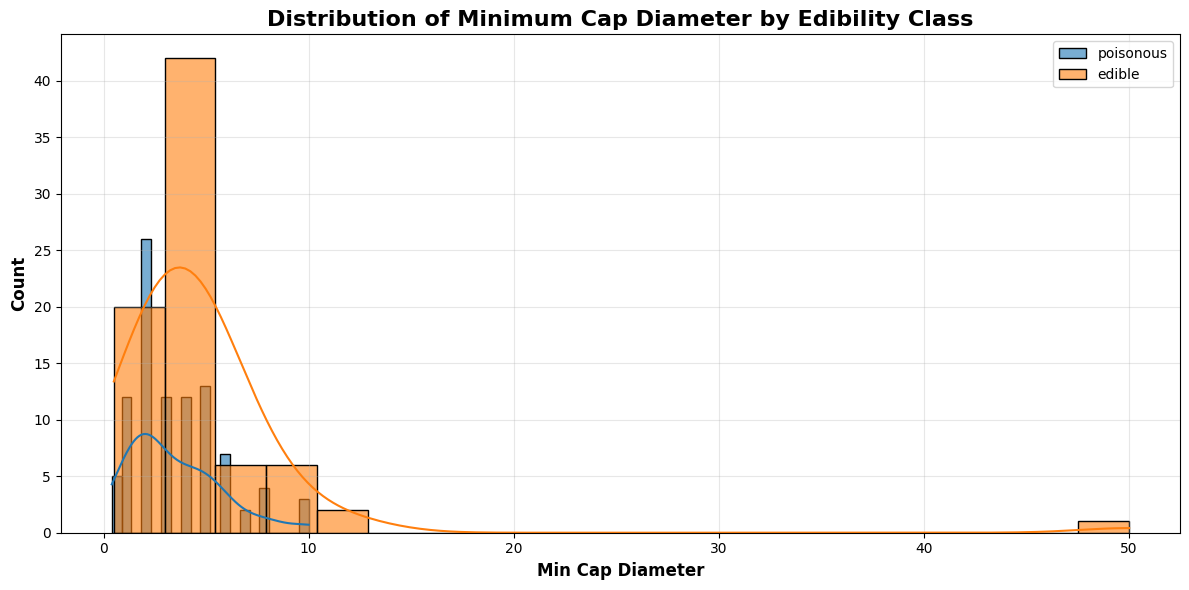

In [483]:
plot_kde_distribution(x='min_cap_diameter', y='class', title='Distribution of Minimum Cap Diameter by Edibility Class')

### max_cap_diameter


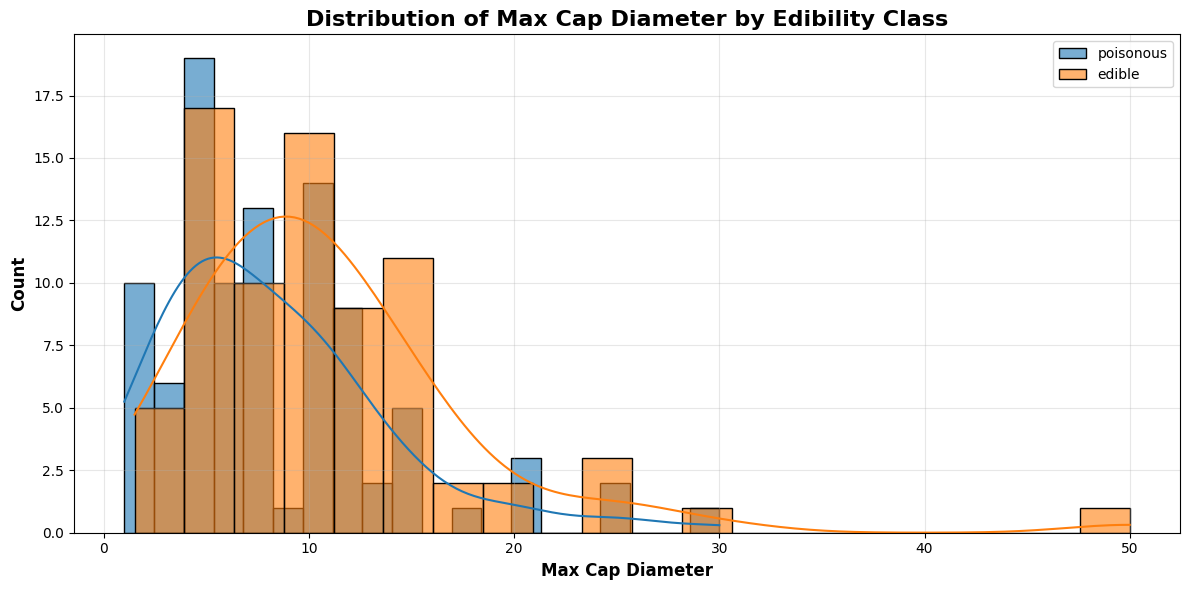

In [484]:
plot_kde_distribution(x='max_cap_diameter', y='class', title='Distribution of Max Cap Diameter by Edibility Class')

### cap_shape


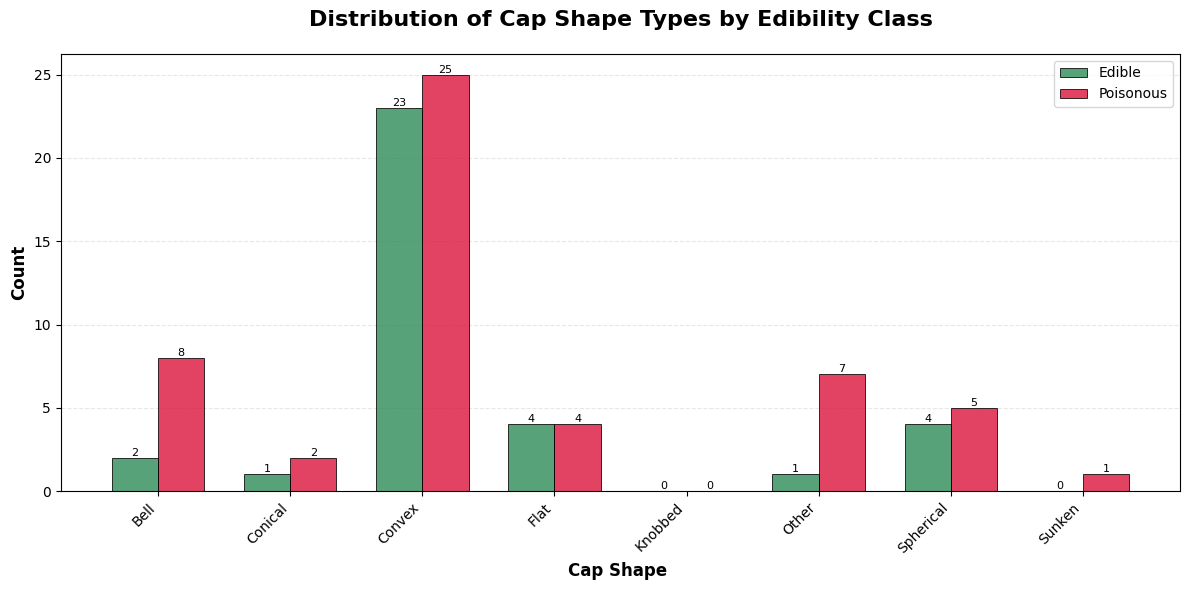

In [485]:
plot_one_hot_distribution_by_class('cap_shape_', 'Distribution of Cap Shape Types by Edibility Class')

In [486]:
df = df.drop(columns=['cap_shape_knobbed'])

### cap_surface


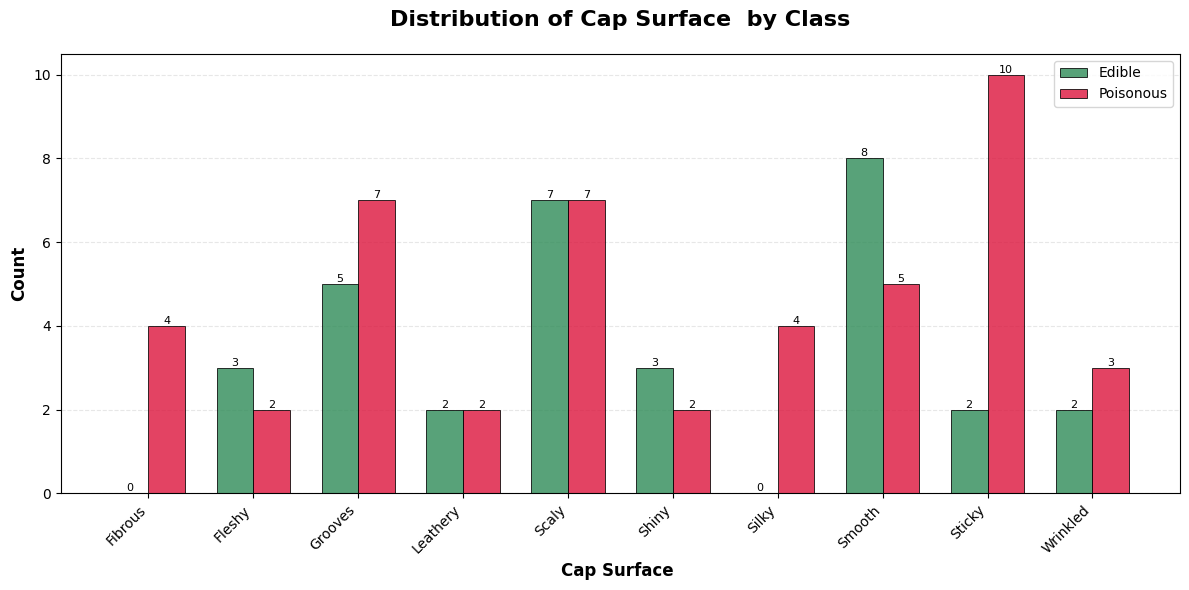

In [487]:
plot_one_hot_distribution_by_class('cap_surface_')

### cap_color


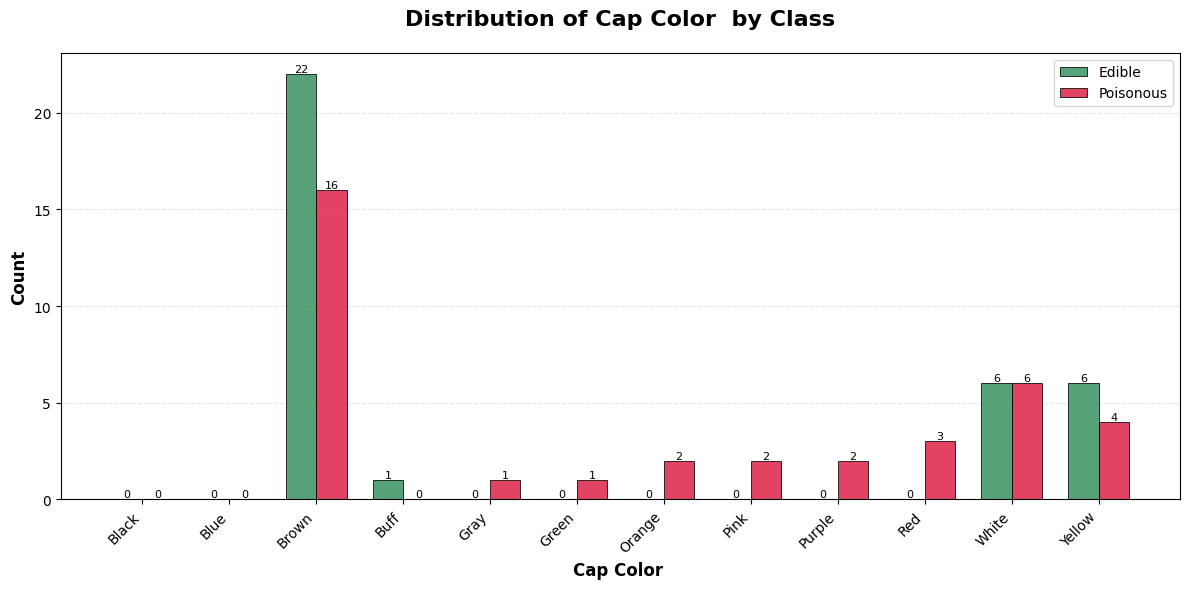

In [488]:
plot_one_hot_distribution_by_class('cap_color_')

In [489]:
df = df.drop(columns=['cap_color_black','cap_color_blue'])

### gill_attachment


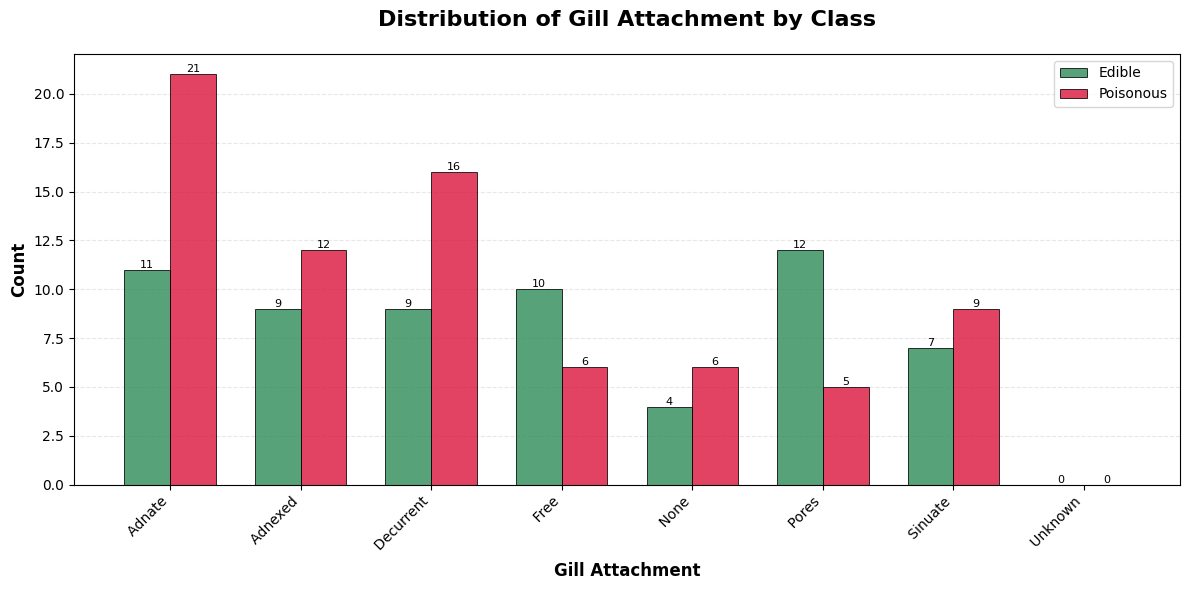

In [490]:
plot_one_hot_distribution_by_class('gill_attachment')

In [491]:
df = df.drop(columns=['gill_attachment_unknown'])

### gill_color


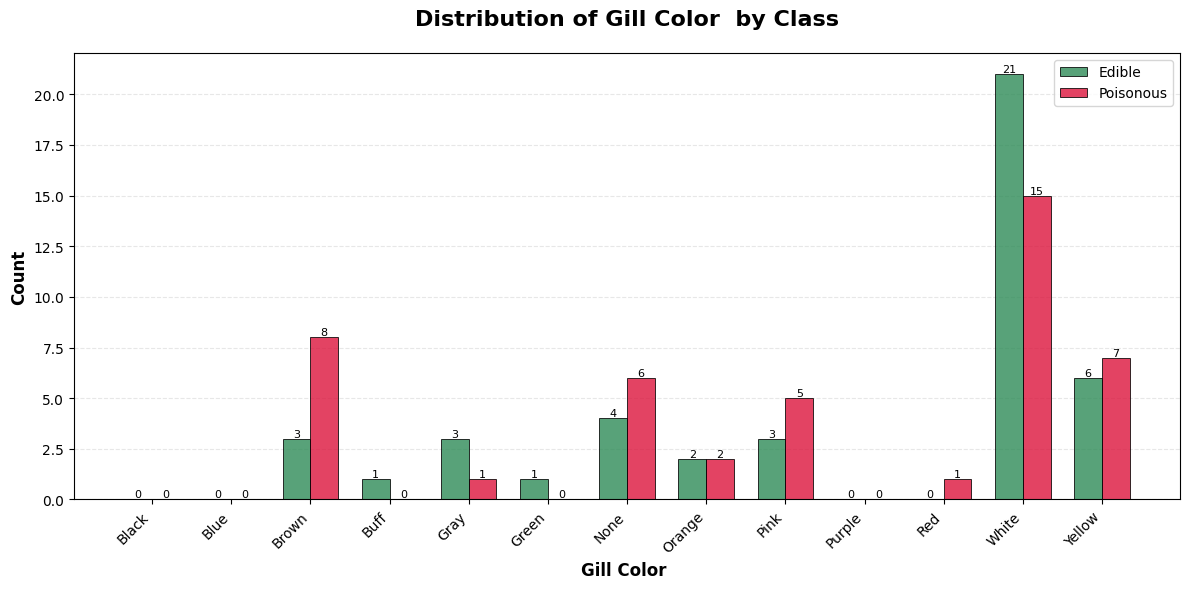

In [492]:
plot_one_hot_distribution_by_class('gill_color_')

In [493]:
df = df.drop(columns=['gill_color_black','gill_color_blue','gill_color_purple'])

### min_stem_height


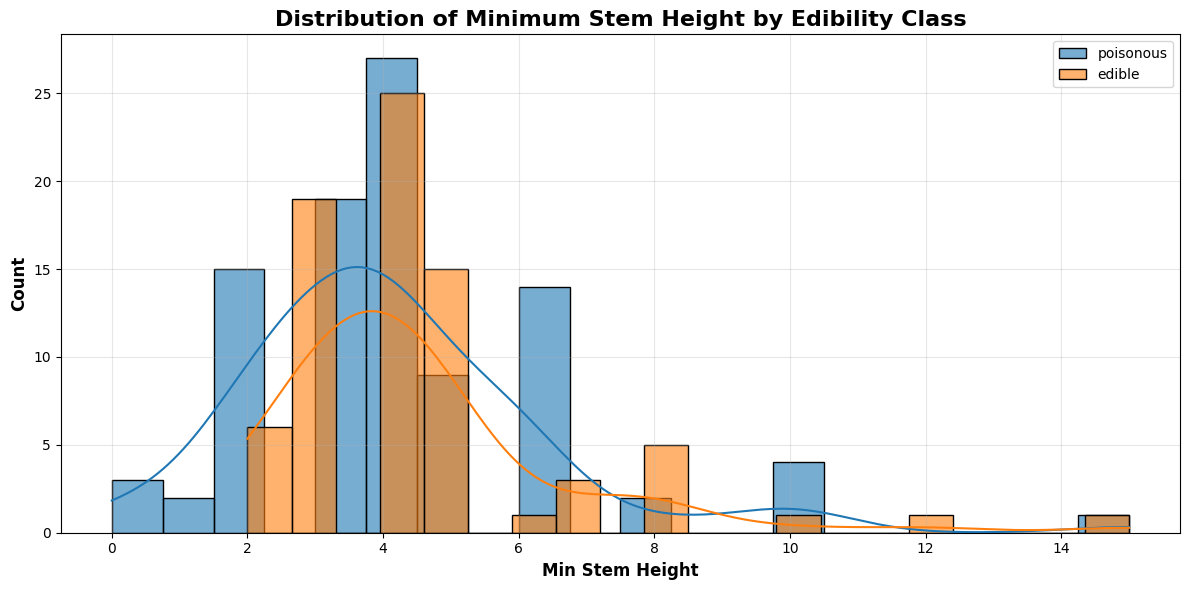

In [494]:
plot_kde_distribution(x='min_stem_height', y='class', title='Distribution of Minimum Stem Height by Edibility Class')

### max_stem_height


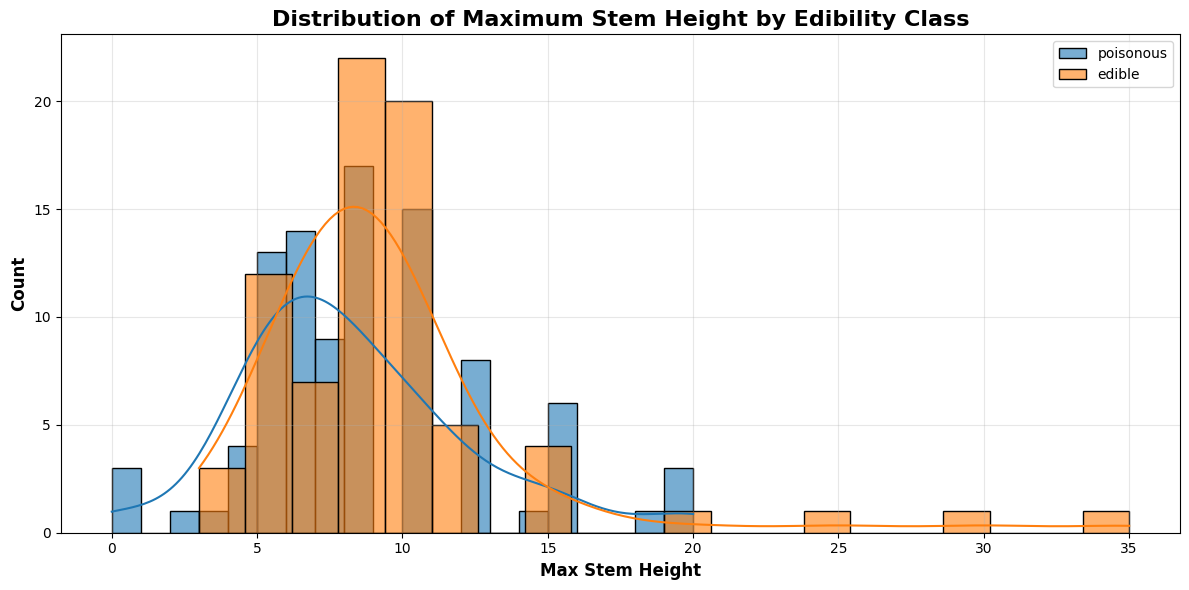

In [495]:
plot_kde_distribution(x='max_stem_height', y='class', title='Distribution of Maximum Stem Height by Edibility Class')

### stem_surface_fibrous


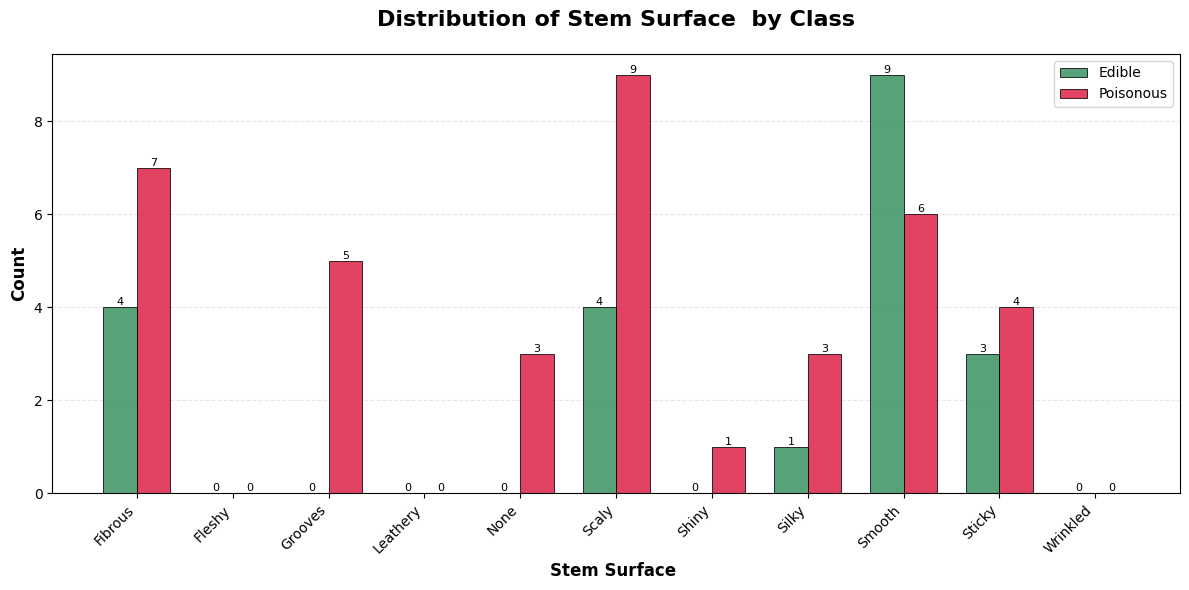

In [496]:
plot_one_hot_distribution_by_class('stem_surface_')

In [497]:
df = df.drop(columns=['stem_surface_fleshy', 'stem_surface_leathery', 'stem_surface_wrinkled'])

### stem_color


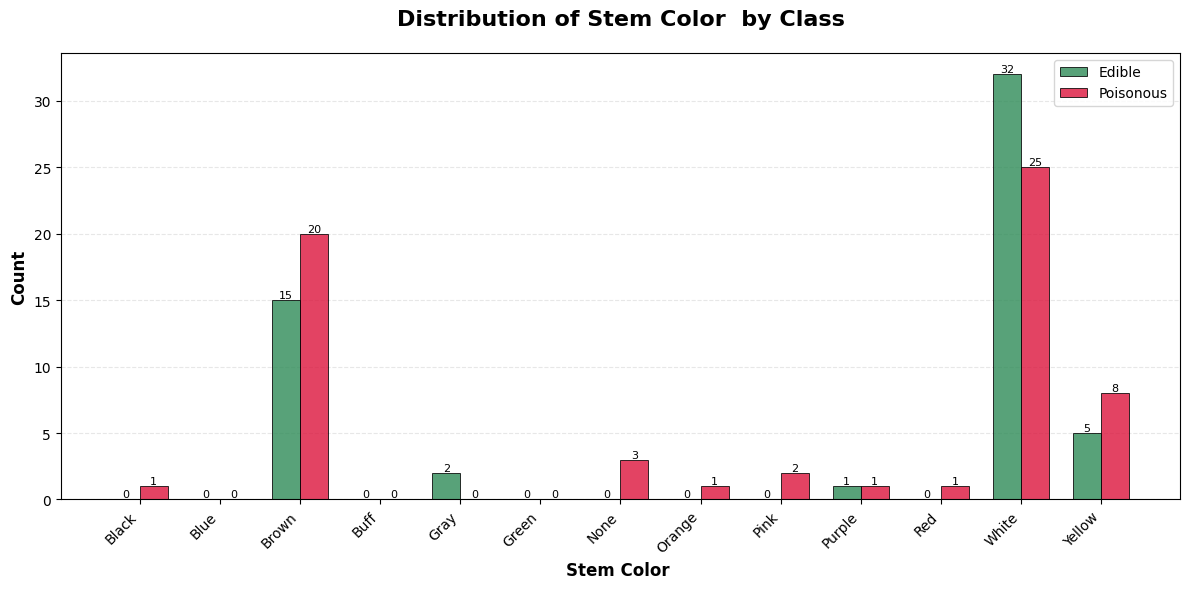

In [498]:
plot_one_hot_distribution_by_class('stem_color_')

In [499]:
df = df.drop(columns=['stem_color_blue', 'stem_color_buff', 'stem_color_green'])

### veil_color


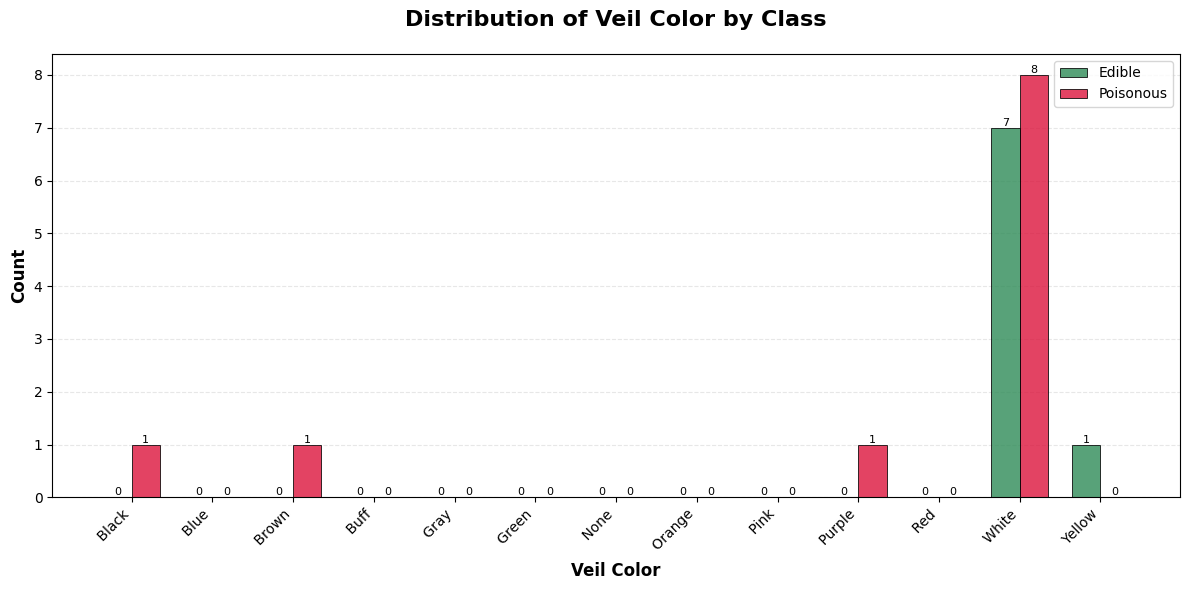

In [500]:
plot_one_hot_distribution_by_class('veil_color')

In [501]:
df = df.drop(columns=['veil_color_blue', 'veil_color_buff', 'veil_color_green', 'veil_color_gray','veil_color_none','veil_color_pink', 'veil_color_orange', 'veil_color_red'])

### ring_type


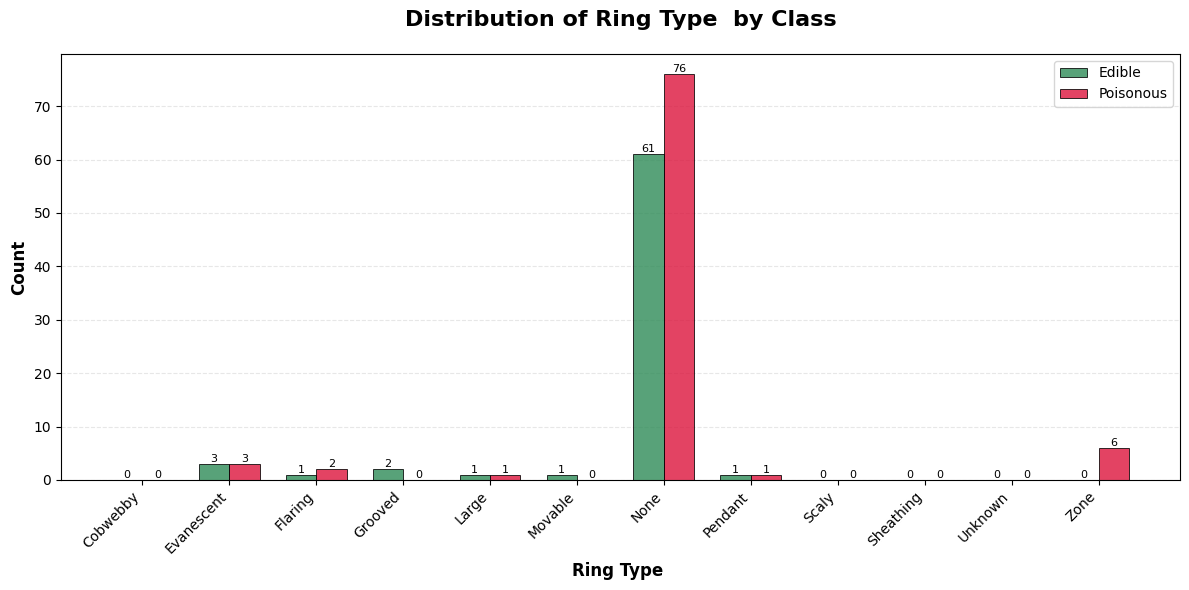

In [502]:
plot_one_hot_distribution_by_class('ring_type_')

In [503]:
df = df.drop(columns=['ring_type_cobwebby', 'ring_type_scaly', 'ring_type_sheathing', 'ring_type_zone', 'ring_type_unknown'])

### Spore_print_color


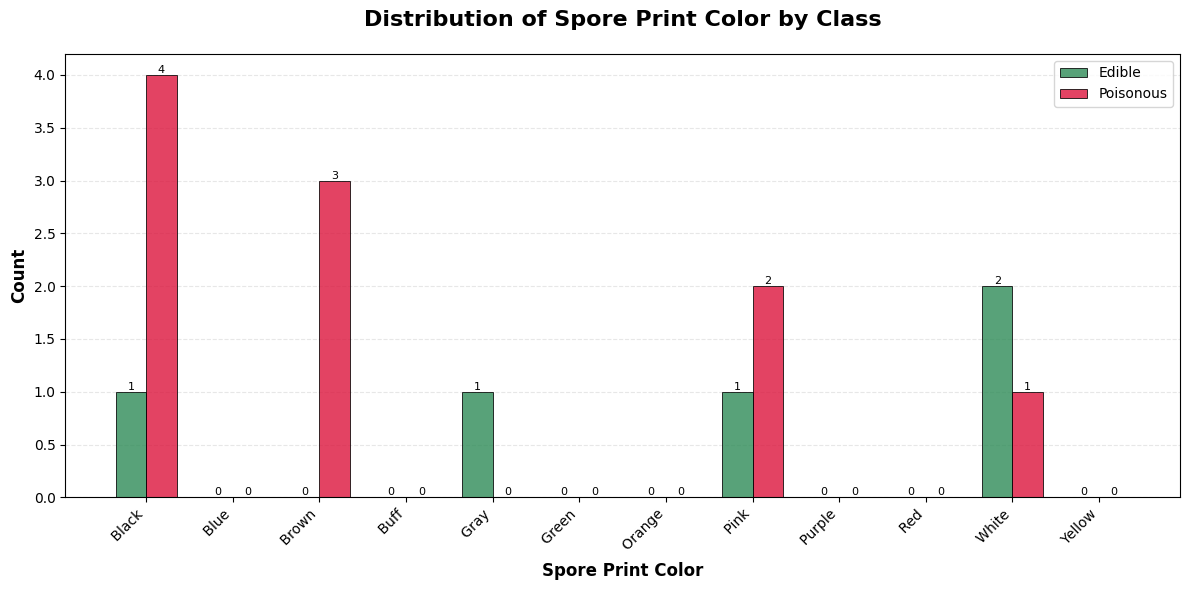

In [504]:
plot_one_hot_distribution_by_class('Spore_print_color')

In [505]:
df = df.drop(columns=['Spore_print_color_blue', 'Spore_print_color_buff', 'Spore_print_color_green', 'Spore_print_color_orange', 'Spore_print_color_purple', 'Spore_print_color_red', 'Spore_print_color_yellow'])

### habitat


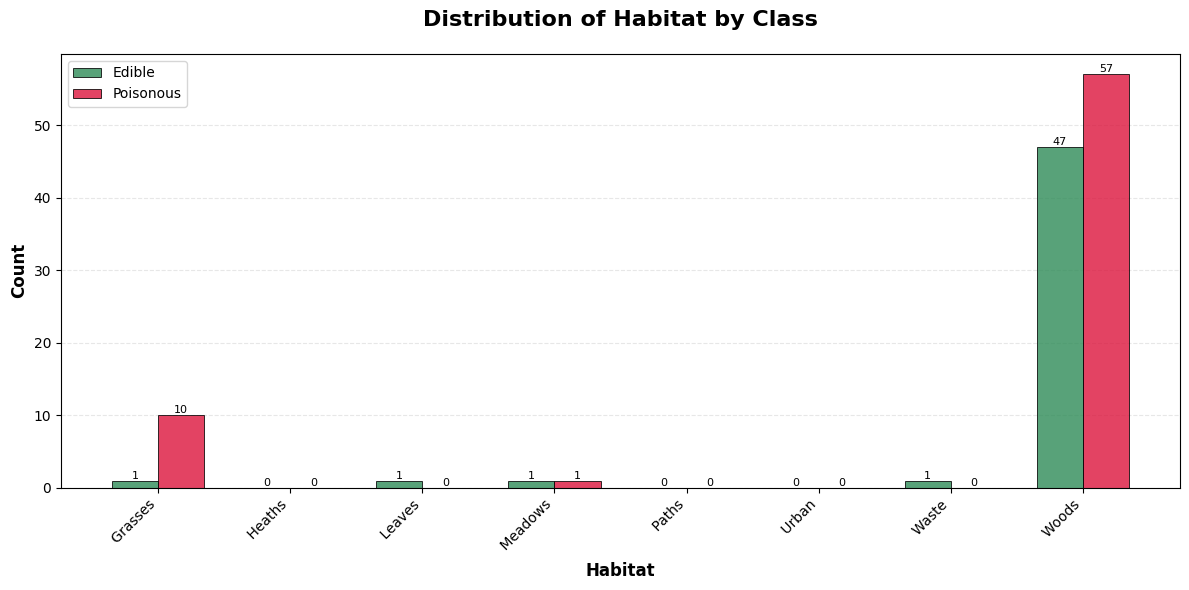

In [506]:
plot_one_hot_distribution_by_class('habitat')

In [507]:
df = df.drop(columns=['habitat_heaths', 'habitat_paths', 'habitat_urban'])

### season


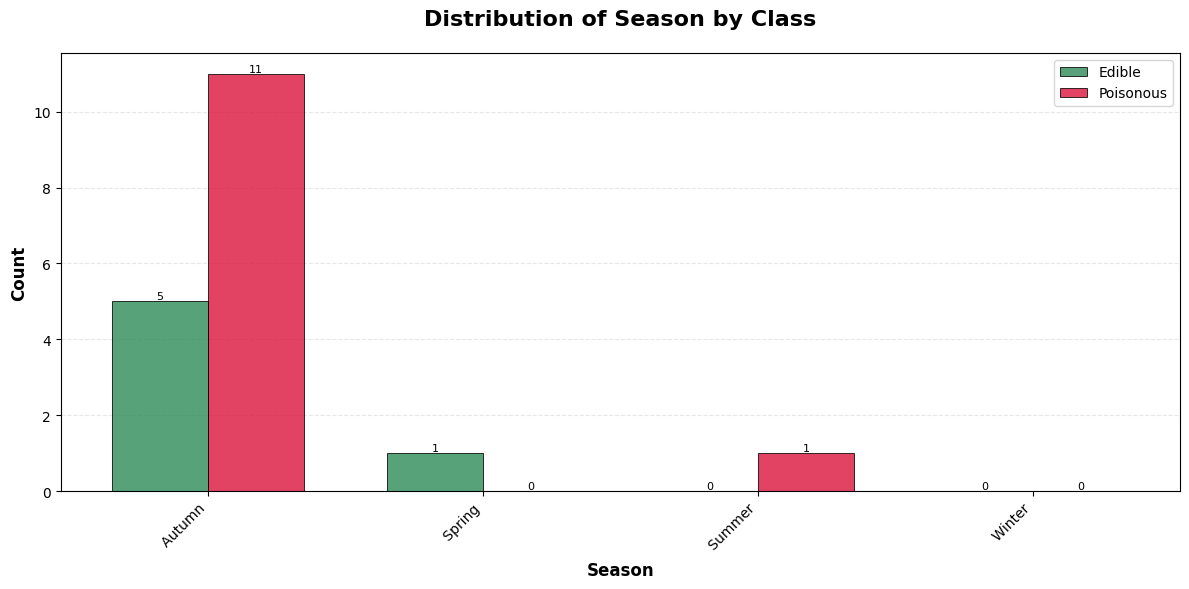

In [508]:
plot_one_hot_distribution_by_class('season')

In [509]:
df = df.drop(columns=['season_winter'])

## Multivariate Analysis


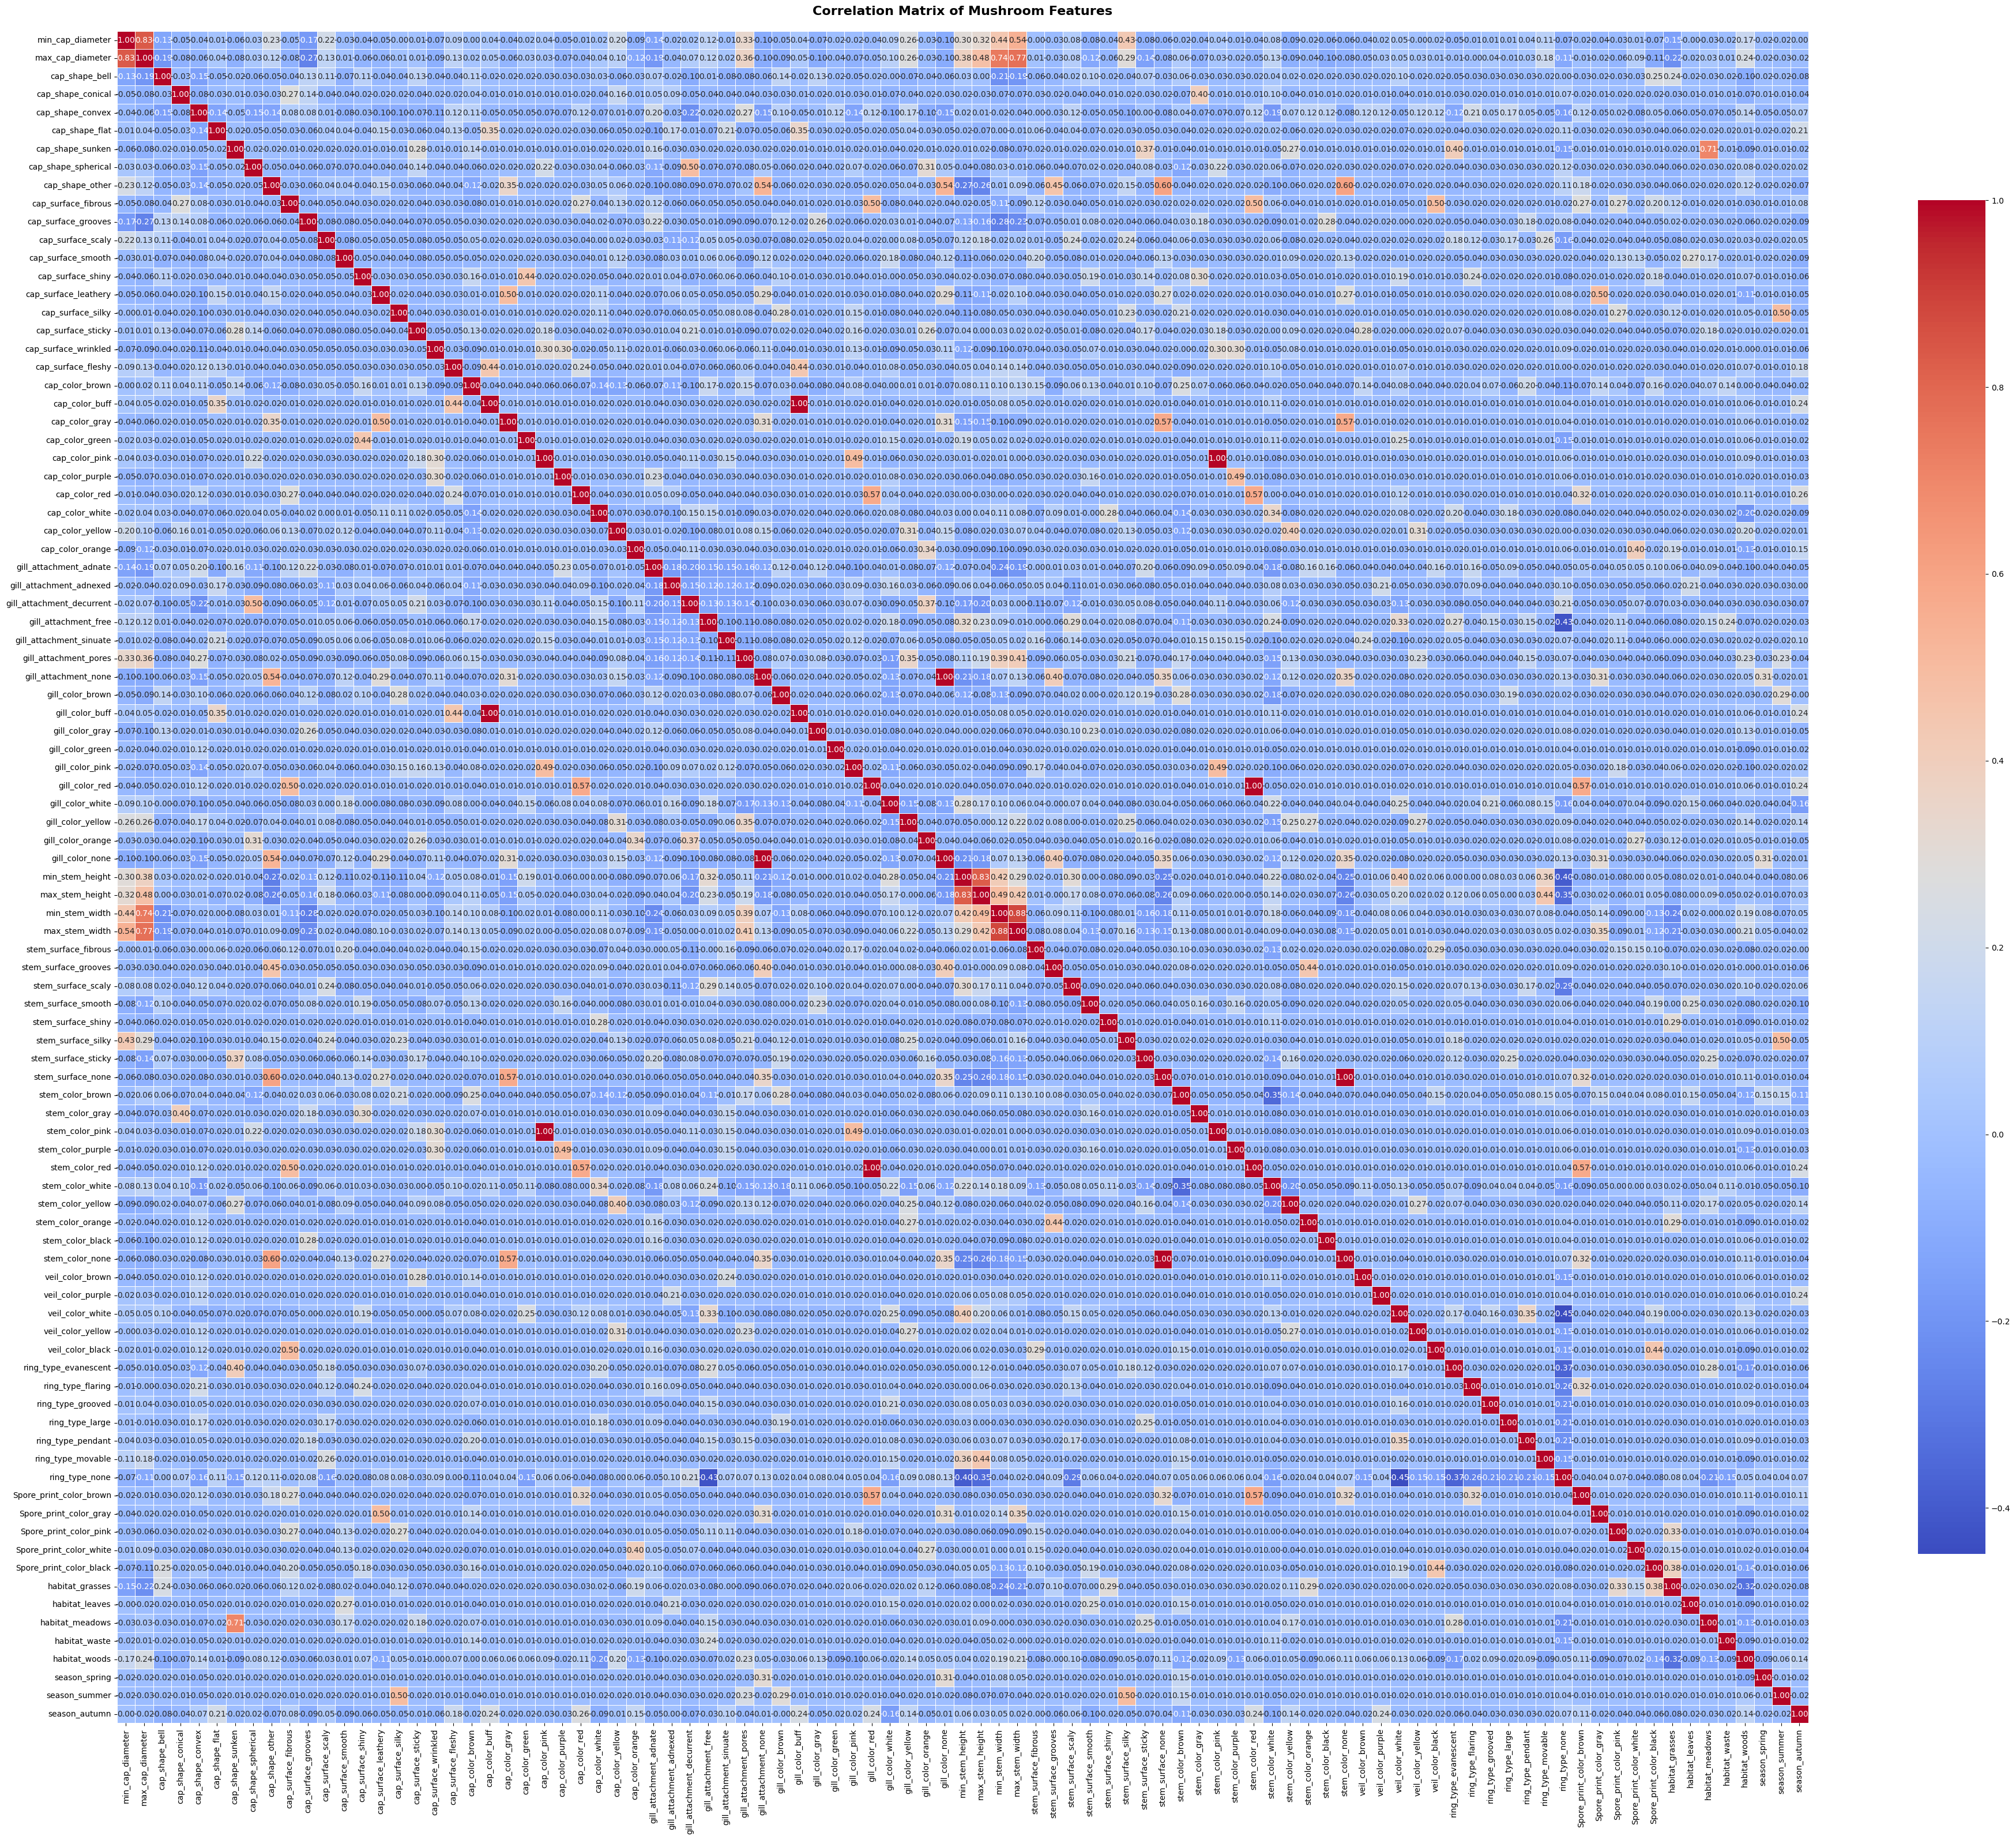

In [510]:
df_corr = df.corr()

plt.figure(figsize=(40, 32))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Matrix of Mushroom Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### remove multicolinearity data


In [511]:
import numpy as np

# Get correlation matrix for numerical features only
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'class' from numerical features if it exists (since we need to encode it first)
if 'class' in numerical_features:
    numerical_features.remove('class')

# Create a copy of df with encoded class for correlation calculation
df_encoded = df.copy()
df_encoded['class_encoded'] = df_encoded['class'].map({'edible': 0, 'poisonous': 1})

# Calculate correlation matrix including the encoded class
corr_matrix = df_encoded[numerical_features + ['class_encoded']].corr()

# Find highly correlated feature pairs (correlation > 0.7 or < -0.7)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            # Skip if one of the features is the class column
            if feature1 != 'class_encoded' and feature2 != 'class_encoded':
                high_corr_pairs.append((feature1, feature2, corr_val))

print(f"Found {len(high_corr_pairs)} highly correlated feature pairs:")
for pair in high_corr_pairs:
    print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")

# Determine which features to drop
features_to_drop = set()

for feature1, feature2, corr_val in high_corr_pairs:
    # Get correlation with class for both features
    corr_with_class_1 = abs(corr_matrix.loc[feature1, 'class_encoded'])
    corr_with_class_2 = abs(corr_matrix.loc[feature2, 'class_encoded'])
    
    # Keep the feature with higher correlation to class, drop the other
    if corr_with_class_1 >= corr_with_class_2:
        features_to_drop.add(feature2)
        print(f"Dropping {feature2} (class corr: {corr_with_class_2:.3f}) over {feature1} (class corr: {corr_with_class_1:.3f})")
    else:
        features_to_drop.add(feature1)
        print(f"Dropping {feature1} (class corr: {corr_with_class_1:.3f}) over {feature2} (class corr: {corr_with_class_2:.3f})")

print(f"\nFeatures to drop: {sorted(features_to_drop)}")
print(f"Number of features before: {len(df.columns)}")

# Drop the highly correlated features
df = df.drop(columns=list(features_to_drop))

print(f"Number of features after: {len(df.columns)}")
print(f"Dropped {len(features_to_drop)} features")

Found 11 highly correlated feature pairs:
min_cap_diameter <-> max_cap_diameter: 0.831
max_cap_diameter <-> min_stem_width: 0.742
max_cap_diameter <-> max_stem_width: 0.771
cap_shape_sunken <-> habitat_meadows: 0.705
cap_color_buff <-> gill_color_buff: 1.000
cap_color_pink <-> stem_color_pink: 1.000
gill_attachment_none <-> gill_color_none: 1.000
gill_color_red <-> stem_color_red: 1.000
min_stem_height <-> max_stem_height: 0.828
min_stem_width <-> max_stem_width: 0.882
stem_surface_none <-> stem_color_none: 1.000
Dropping min_cap_diameter (class corr: 0.151) over max_cap_diameter (class corr: 0.196)
Dropping max_cap_diameter (class corr: 0.196) over min_stem_width (class corr: 0.224)
Dropping max_stem_width (class corr: 0.183) over max_cap_diameter (class corr: 0.196)
Dropping habitat_meadows (class corr: 0.012) over cap_shape_sunken (class corr: 0.068)
Dropping gill_color_buff (class corr: 0.085) over cap_color_buff (class corr: 0.085)
Dropping stem_color_pink (class corr: 0.097) over

# Preprocessing


In [512]:
df.fillna('none', inplace=True)

In [513]:
from sklearn.preprocessing import LabelEncoder
import joblib
import os

# Create label encoders for categorical columns
label_encoders = {}
categorical_columns = ['family', 'class', 'does-bruise-or-bleed', 'gill-spacing', 'stem-root', 'veil-type', 'has-ring']

# Create encoder directory if it doesn't exist
os.makedirs('encoder', exist_ok=True)

# Apply label encoding and save encoders in one loop
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

    # Save encoder immediately
    joblib.dump(le, f'encoder/{col}_encoder.joblib')

    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    print(f"Saved {col} encoder to encoder/{col}_encoder.joblib")

print(f"\nProcessed and saved {len(label_encoders)} label encoders successfully")

Encoded family: {'Amanita Family': 0, 'Bolbitius Family': 1, 'Bolete Family': 2, 'Bracket Fungi': 3, 'Chanterelle Family': 4, 'Cortinarius Family': 5, 'Crepidotus Family': 6, 'Ear-Pick Family': 7, 'Entoloma Family': 8, 'Hydnum Family': 9, 'Ink Cap Family': 10, 'Jelly Discs Family': 11, 'Lepiota Family': 12, 'Morel Family': 13, 'Mushroom Family': 14, 'Oyster Mushroom Family': 15, 'Paxillus Family': 16, 'Pluteus Family': 17, 'Russula Family': 18, 'Saddle-Cup Family': 19, 'Stropharia Family': 20, 'Tricholoma Family': 21, 'Wax Gill Family': 22}
Saved family encoder to encoder/family_encoder.joblib
Encoded class: {'edible': 0, 'poisonous': 1}
Saved class encoder to encoder/class_encoder.joblib
Encoded does-bruise-or-bleed: {'no': 0, 'yes': 1}
Saved does-bruise-or-bleed encoder to encoder/does-bruise-or-bleed_encoder.joblib
Encoded gill-spacing: {'close': 0, 'distant': 1, 'none': 2}
Saved gill-spacing encoder to encoder/gill-spacing_encoder.joblib
Encoded stem-root: {'bulbous': 0, 'club': 1,

# Modeling


## Random Forest


Random Forest Classification Results:
Accuracy: 0.6857
Matthews Correlation Coefficient (MCC): 0.3705

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.72      0.68      0.70        19

    accuracy                           0.69        35
   macro avg       0.68      0.69      0.68        35
weighted avg       0.69      0.69      0.69        35



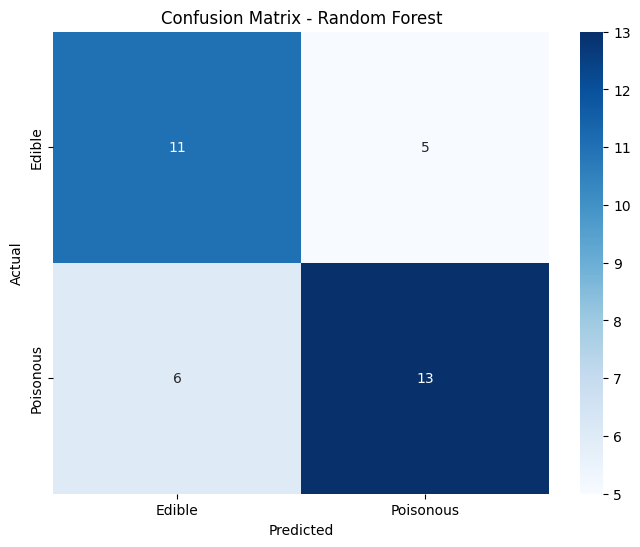

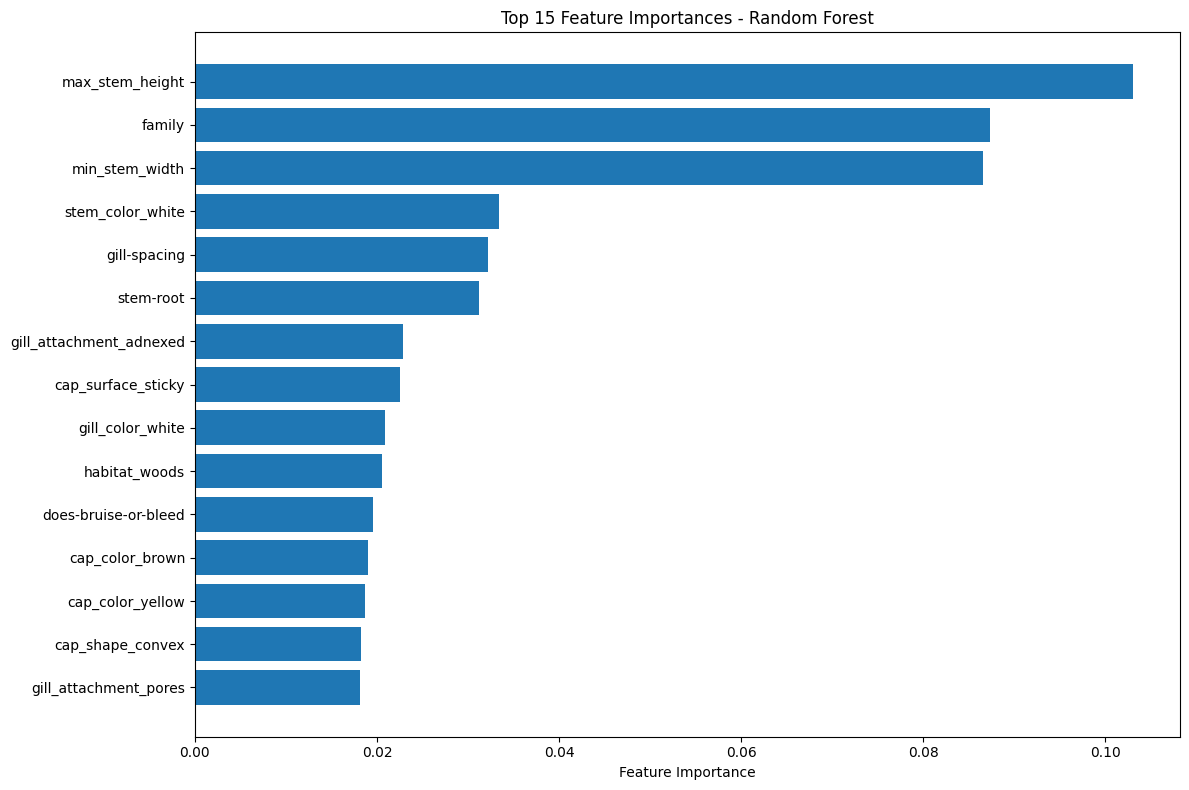


Top 10 Most Important Features:
                    feature  importance
48          max_stem_height        0.10
0                    family        0.09
49           min_stem_width        0.09
61         stem_color_white        0.03
2              gill-spacing        0.03
3                 stem-root        0.03
34  gill_attachment_adnexed        0.02
20       cap_surface_sticky        0.02
45         gill_color_white        0.02
85            habitat_woods        0.02


In [516]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef

# Prepare features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print results
print("Random Forest Classification Results:")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Matthews Correlation Coefficient (MCC): {matthews_corrcoef(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


In [515]:
models_smote

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.74               0.75     0.75      0.74   
XGBClassifier                      0.71               0.72     0.72      0.71   
BaggingClassifier                  0.69               0.71     0.71      0.67   
LGBMClassifier                     0.69               0.70     0.70      0.68   
ExtraTreeClassifier                0.66               0.66     0.66      0.66   
CalibratedClassifierCV             0.63               0.65     0.65      0.61   
NearestCentroid                    0.63               0.64     0.64      0.62   
AdaBoostClassifier                 0.63               0.64     0.64      0.62   
BernoulliNB                        0.60               0.62     0.62      0.59   
PassiveAggressiveClassifier        0.60               0.61     0.61      0.59   
NuSVC                              0.60               0.61     0.61      0.60   
QuadraticDiscriminantAnalysis      0.60               0.60     0.60      0.60   
RandomForestClassifier             0.60               0.60     0.60      0.60   
Perceptron                         0.57               0.58     0.58      0.57   
LinearSVC                          0.57               0.58     0.58      0.57   
LinearDiscriminantAnalysis         0.57               0.58     0.58      0.57   
SVC                                0.57               0.58     0.58      0.57   
KNeighborsClassifier               0.54               0.57     0.57      0.48   
GaussianNB                         0.54               0.57     0.57      0.48   
LogisticRegression                 0.54               0.55     0.55      0.54   
RidgeClassifier                    0.54               0.55     0.55      0.54   
SGDClassifier                      0.54               0.55     0.55      0.54   
DecisionTreeClassifier             0.54               0.54     0.54      0.54   
LabelSpreading                     0.51               0.54     0.54      0.48   
LabelPropagation                   0.51               0.54     0.54      0.48   
RidgeClassifierCV                  0.51               0.52     0.52      0.51   
DummyClassifier                    0.46               0.50     0.50      0.29   

                               Time Taken  
Model                                      
ExtraTreesClassifier                 0.11  
XGBClassifier                        0.12  
BaggingClassifier                    0.06  
LGBMClassifier                       0.08  
ExtraTreeClassifier                  0.03  
CalibratedClassifierCV               0.09  
NearestCentroid                      0.02  
AdaBoostClassifier                   0.16  
BernoulliNB                          0.02  
PassiveAggressiveClassifier          0.02  
NuSVC                                0.02  
QuadraticDiscriminantAnalysis        0.04  
RandomForestClassifier               0.13  
Perceptron                           0.01  
LinearSVC                            0.04  
LinearDiscriminantAnalysis           0.05  
SVC                                  0.02  
KNeighborsClassifier                 0.02  
GaussianNB                           0.03  
LogisticRegression                   0.03  
RidgeClassifier                      0.02  
SGDClassifier                        0.02  
DecisionTreeClassifier               0.03  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
RidgeClassifierCV                    0.05  
DummyClassifier                      0.02